In [2]:
import numpy as np
import torch
import SimpleITK as sitk

In [3]:
niiobj = sitk.GetArrayFromImage(sitk.ReadImage(
    "/home/yeep/project/py/ALSph2d/data/val/image/201404260019_t1_fs_tse_rs_tra_0_0_0_axial_20140429.nii.gz"))

In [6]:
niiobj = (niiobj - niiobj.mean()) / niiobj.std()

In [12]:
niiobj.shape

(35, 640, 640)

In [44]:
mean = torch.mean(torch.tensor(niiobj), (1, 2))
std = torch.std(torch.tensor(niiobj), (1, 2))

In [45]:
(torch.from_numpy(niiobj) - mean) / std

RuntimeError: The size of tensor a (640) must match the size of tensor b (35) at non-singleton dimension 2

In [48]:
torchnii = torch.from_numpy(niiobj)

In [50]:
torchnii - mean

RuntimeError: The size of tensor a (640) must match the size of tensor b (35) at non-singleton dimension 2

In [56]:
a = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
a.log_softmax(dim=0)

tensor([-3.4402, -2.4402, -1.4402, -0.4402])

In [57]:
a = torch.randn(15, 2, 8, 8)
b = a.log_softmax(dim=1)

In [63]:
a = torch.randn(5)
b = torch.randn(4, 3)

In [64]:
torch.matmul(a, b)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x5 and 4x3)

In [71]:
import numpy as np

a = torch.randn(16, 2, 10, 10).softmax(dim=1)
spacing32 = np.spacing(1, dtype=np.float32)

In [126]:
torch.abs(a[:, 0] - a[:, 1]).mean(dim=[-2, -1]).shape

torch.Size([16])

In [99]:
torch.mean(-a * torch.log(1e-12 + a), dim=[1, 2, 3]) * 2

tensor([0.5532, 0.5594, 0.5131, 0.5266, 0.5661, 0.5298, 0.5426, 0.5494, 0.5452,
        0.5304, 0.5325, 0.5255, 0.5337, 0.5515, 0.5553, 0.5398])

In [106]:
out = torch.mean(-a * torch.log(a + 1e-12), dim=[1, 2, 3]) * 2

In [113]:
torch.column_stack([torch.arange(0, a.shape[0], dtype=torch.int), out]).data

tensor([[ 0.0000,  0.5532],
        [ 1.0000,  0.5594],
        [ 2.0000,  0.5131],
        [ 3.0000,  0.5266],
        [ 4.0000,  0.5661],
        [ 5.0000,  0.5298],
        [ 6.0000,  0.5426],
        [ 7.0000,  0.5494],
        [ 8.0000,  0.5452],
        [ 9.0000,  0.5304],
        [10.0000,  0.5325],
        [11.0000,  0.5255],
        [12.0000,  0.5337],
        [13.0000,  0.5515],
        [14.0000,  0.5553],
        [15.0000,  0.5398]])

In [97]:
def cal_entropy_score(probs):  # C,H,W  熵越大，越难分
    batch_scores = []
    for i in range(len(probs)):  # prob img
        entropy = np.mean(-np.nansum(np.multiply(probs[i], np.log(probs[i] + 1e-12)), axis=0))  # 表示沿着第1维计算
        batch_scores.append(entropy)
    return batch_scores

In [101]:
a.log()

tensor([[[[-0.2561, -0.6062, -1.2486,  ..., -1.2746, -0.4427, -0.1826],
          [-1.1516, -1.4491, -0.7113,  ..., -0.1433, -0.5624, -1.6300],
          [-0.1890, -0.3224, -0.3352,  ..., -2.0540, -0.5882, -0.3552],
          ...,
          [-0.9154, -0.2701, -0.9762,  ..., -0.5006, -0.7071, -3.2098],
          [-1.1479, -1.0374, -1.3309,  ..., -1.7035, -0.6645, -0.6043],
          [-2.4275, -0.2842, -0.6278,  ..., -0.8470, -2.6765, -0.2615]],

         [[-1.4874, -0.7883, -0.3381,  ..., -0.3279, -1.0280, -1.7902],
          [-0.3800, -0.2676, -0.6753,  ..., -2.0133, -0.8436, -0.2181],
          [-1.7590, -1.2889, -1.2559,  ..., -0.1372, -0.8105, -1.2074],
          ...,
          [-0.5114, -1.4409, -0.4728,  ..., -0.9318, -0.6794, -0.0412],
          [-0.3817, -0.4375, -0.3069,  ..., -0.2009, -0.7226, -0.7906],
          [-0.0924, -1.3968, -0.7630,  ..., -0.5598, -0.0713, -1.4691]]],


        [[[-0.4371, -0.3187, -0.9916,  ..., -0.4332, -0.4896, -1.3280],
          [-0.4556, -0.0748,

In [4]:
import torch.nn as nn
import torch

In [5]:
a = nn.Dropout()

In [8]:
a(torch.ones(16, 8, 8))

tensor([[[0., 2., 2.,  ..., 2., 0., 2.],
         [2., 0., 0.,  ..., 0., 2., 2.],
         [2., 0., 2.,  ..., 2., 2., 2.],
         ...,
         [2., 0., 0.,  ..., 0., 2., 2.],
         [2., 2., 0.,  ..., 0., 2., 0.],
         [2., 2., 0.,  ..., 2., 2., 0.]],

        [[2., 0., 2.,  ..., 0., 0., 2.],
         [2., 2., 0.,  ..., 2., 2., 0.],
         [0., 0., 2.,  ..., 2., 0., 0.],
         ...,
         [0., 0., 2.,  ..., 0., 2., 0.],
         [0., 0., 2.,  ..., 0., 0., 0.],
         [0., 2., 0.,  ..., 2., 0., 2.]],

        [[2., 2., 0.,  ..., 0., 2., 2.],
         [2., 2., 0.,  ..., 0., 2., 2.],
         [2., 2., 0.,  ..., 2., 0., 0.],
         ...,
         [2., 0., 0.,  ..., 0., 2., 0.],
         [0., 2., 2.,  ..., 0., 2., 0.],
         [0., 2., 0.,  ..., 2., 0., 2.]],

        ...,

        [[2., 2., 2.,  ..., 0., 0., 2.],
         [0., 0., 0.,  ..., 0., 2., 0.],
         [2., 2., 2.,  ..., 2., 2., 2.],
         ...,
         [0., 2., 0.,  ..., 2., 2., 0.],
         [0., 2., 2., 

In [29]:
import torch
import numpy as np

In [30]:
a = torch.randn(1, 16, 16)
b = torch.randn(1, 16, 16)

In [31]:
torch.concat([a, b]).shape

torch.Size([2, 16, 16])

In [32]:
torch.stack([a, b]).shape

torch.Size([2, 1, 16, 16])

In [49]:
data = torch.randn(10, 16, 2, 10, 10)

In [50]:
data

tensor([[[[[-4.8334e-01, -1.4555e+00, -3.4388e-01,  ...,  2.1974e-01,
             5.1325e-01,  1.6290e-01],
           [ 6.2118e-01,  3.9054e-01,  6.3982e-01,  ...,  3.8063e-01,
            -5.0744e-01,  1.2305e+00],
           [-5.7083e-01, -1.3409e-02, -5.4603e-01,  ..., -3.1158e-01,
            -1.6503e+00, -8.3915e-01],
           ...,
           [-8.0001e-01, -5.0149e-01,  9.3452e-02,  ..., -1.8166e+00,
            -3.3981e-01, -5.4315e-01],
           [ 2.3842e-01,  8.6278e-01,  8.5218e-01,  ...,  9.1509e-01,
            -1.3137e-01, -1.0346e+00],
           [ 4.9777e-01,  3.4040e-01,  3.7302e-01,  ..., -4.5129e-01,
             3.7988e-01,  6.3454e-02]],

          [[ 3.4251e-02,  1.2985e-01,  1.2217e+00,  ...,  6.1570e-01,
            -8.0567e-02,  3.2923e-01],
           [ 6.6053e-01,  4.2268e-01,  3.4507e-02,  ...,  1.4240e+00,
            -3.1264e-01,  1.3622e+00],
           [-1.3195e+00, -2.2647e-01, -6.3536e-01,  ..., -4.6400e-03,
            -9.8024e-01,  6.4066e-02],
 

In [51]:
a.mean(0).shape

torch.Size([16, 16])

In [56]:
SPACING32 = np.spacing(1, dtype=np.float32)
SPACING32

1.1920929e-07

In [82]:
data = torch.randint(0, 200, size=(10, 16, 2, 10, 10), dtype=torch.float32).softmax(dim=2)

In [83]:
mean = data.mean(0)

In [84]:
mean_entropy = -torch.mean(mean * torch.log(mean + SPACING32), dim=[-3, -2, -1])

In [85]:
mean_entropy

tensor([0.3240, 0.3159, 0.3242, 0.3179, 0.3235, 0.3214, 0.3172, 0.3197, 0.3199,
        0.3201, 0.3238, 0.3195, 0.3187, 0.3185, 0.3208, 0.3143])

torch.Size([10, 16, 2, 10, 10])

In [87]:
torch.mean(torch.mean(-data * torch.log(data + SPACING32), dim=[-3, -2, -1]), dim=0)

tensor([0.0097, 0.0086, 0.0089, 0.0088, 0.0077, 0.0061, 0.0069, 0.0097, 0.0072,
        0.0069, 0.0071, 0.0062, 0.0072, 0.0088, 0.0090, 0.0069])

In [88]:
torch.mean(-data * torch.log(data + SPACING32), dim=[0, -3, -2, -1])

tensor([0.0097, 0.0086, 0.0089, 0.0088, 0.0077, 0.0061, 0.0069, 0.0097, 0.0072,
        0.0069, 0.0071, 0.0062, 0.0072, 0.0088, 0.0090, 0.0069])

In [31]:
import torchvision.transforms as T

In [32]:
class AddGaussianNoise(object):
    def __init__(self, mean=0., std=1.):
        self.std = std
        self.mean = mean

    def __call__(self, tensor):
        tensor = tensor.detach().cpu()
        noise = torch.randn(tensor.size())
        return tensor + noise * self.std + self.mean

    def __repr__(self):
        return self.__class__.__name__ + '(mean={0}, std={1})'.format(self.mean, self.std)

In [33]:
def augment_data(img, flip=0, n_rotation=0, flip_axis=2, rot_axis0=2, rot_axis1=3, jitter=0, blur=1, mean_gaussian=0,
                 std_gaussian=0):
    """
    We apply the given transformation (flip and rotation) on the input image
    :param flip: [0 or 1] flip applied as the initial transformation
    :param flip: [0, 1, 2, 3] number of rotations applied as the initial transformation
    :param jitter:  (same) value for amount of brightness, contrast, saturation and hue jitter.
                    The factor will be uniformly from [max(0, 1 - value), 1 + value],
                    except for hue value which will be chosen between  0.5 < =[-value, value] <= 0.5
    :param blur: (same) value of kernel size and sigma for Gaussian blur. Kernel will have shape (value, value)
                 Sigma will be chosen uniformly at random between 0.1 and that value.
    """
    if flip != 0:
        img = torch.flip(img, [flip_axis])

    if n_rotation != 0:
        img = torch.rot90(img, n_rotation, [rot_axis0, rot_axis1])

    if jitter != 0:
        transform = T.ColorJitter(brightness=jitter, contrast=jitter, saturation=jitter, hue=jitter)
        img = transform(img)

    if blur != 1:
        transform = T.GaussianBlur(kernel_size=(blur, blur), sigma=(0.1, blur))
        img = transform(img)

    if mean_gaussian != 0 or std_gaussian != 0:
        transform = AddGaussianNoise(mean_gaussian, std_gaussian)
        img = transform(img)

    return img

In [67]:
import random

In [69]:

def random_augmentation(x, aug_dic=None, flip_axis=2, rotaxis0=2, rotaxis1=3, aug_gaussian_mean=0, aug_gaussian_std=0):
    """ We do augmentation (flip, rotation, mult(0.9 - 1.1)
    :param x: a tensor of shape (#channels, x, y) or (#channels, x, y, z)
    :param aug_dic: augmentation dictionary (if given)
    :param flip_axis: tensor axis for flipping
    :param rotaxis0: tensor first axis of rotation
    :param rotaxis1: tensor second axis of rotation
    :param type: type of input ('img' or 'target'). If 'target', no jitter or blurring will be applied
    """
    if aug_dic is None:
        # We get params for number of flips (0 or 1) and number of rotations (0 ro 3)
        flip = torch.randint(0, 2, (1,)).item() if random.random() > 0.5 else 0
        num_rot = torch.randint(0, 4, (1,)).item() if random.random() > 0.5 else 0

        # We define the same value for amount of brightness, contrast, saturation and hue jitter.
        # The factor will be uniformly from [max(0, 1 - value), 1 + value],
        # except for hue value which will be chosen between  0.5 < =[-value, value] <= 0.5
        jitter = 0.5 if random.random() > 0.5 else 0

        # We define the same value for kernel size and max sigma.
        # Sigma will be chosen uniformly at random between (0.1, value)
        blur = 3 if random.random() > 0.5 else 1

        mean_gaussian = aug_gaussian_mean if random.random() > 0.5 else 0
        std_gaussian = aug_gaussian_std if random.random() > 0.5 else 0

        aug_dic = {'flip': flip,
                   'rot': num_rot,
                   'jitter': jitter,
                   'blur': blur,
                   'mean_gaussian': mean_gaussian,
                   'std_gaussian': std_gaussian
                   }
    else:
        flip = aug_dic['flip']
        num_rot = aug_dic['rot']

        # If it is a target image, there will be no jitter and bluring transformation
        jitter = 0 if type == 'target' else aug_dic['jitter']
        blur = 1 if type == 'target' else aug_dic['blur']
        mean_gaussian = 0 if type == 'target' else aug_dic['mean_gaussian']
        std_gaussian = 0 if type == 'target' else aug_dic['std_gaussian']

    # We apply the transformations
    x_aug = augment_data(x, flip=flip, n_rotation=num_rot, flip_axis=flip_axis, rot_axis0=rotaxis0, rot_axis1=rotaxis1,
                         jitter=jitter, blur=blur, mean_gaussian=mean_gaussian, std_gaussian=std_gaussian)

    return x_aug, aug_dic

In [70]:
def reverse_augment_data(img, flip=0, n_rotation=0, flip_axis=2, rot_axis0=2, rot_axis1=3):
    """
    We reverse the transformation (flip and rotation) of the given image
    :param flip: [0 or 1] flip applied as the initial transformation
    :param flip: [0, 1, 2, 3] number of rotations applied as the initial transformation
    """
    if n_rotation != 0:
        img = torch.rot90(img, 4 - n_rotation, [rot_axis0, rot_axis1])

    if flip != 0:
        img = torch.flip(img, [flip_axis])

    return img

In [71]:
import torch
import os
import numpy as np
from os.path import join, exists
import SimpleITK as sitk
from torch.utils.data import Dataset, SubsetRandomSampler
from PIL import Image
import albumentations as A

In [72]:
class Dataset2d(Dataset):
    def __init__(self, datafolder: str, transform=None) -> None:
        assert os.path.exists(datafolder), datafolder
        super().__init__()
        self.data_folder = datafolder
        self.transforms = transform
        assert exists(datafolder)
        assert exists((join(datafolder, "image")))
        self.jpg_data = os.listdir(os.path.join(datafolder, "image"))

    def __len__(self):
        return len(self.jpg_data)

    def __getitem__(self, index):
        data_name = label_name = self.jpg_data[index]
        data_path, label_path = join(self.data_folder, "image", data_name), join(self.data_folder, "label", label_name)
        data, label = Image.open(data_path).convert("L"), Image.open(label_path).convert("L")
        data, label = np.asarray(data, dtype=np.float32), np.asarray(label, dtype=np.uint8)
        data = (data - data.mean()) / data.std()
        if self.transforms is not None:
            transformed = self.transforms(image=data, mask=label)
            data, label = transformed["image"], transformed["mask"]

        return torch.tensor(data, dtype=torch.float32).unsqueeze(0), torch.tensor(label == 255,
                                                                                  dtype=torch.long).unsqueeze(0)

In [73]:
train_transform = A.Compose([A.PadIfNeeded(512, 512), A.CropNonEmptyMaskIfExists(416, 416, p=1)])
train_dataset = Dataset2d(datafolder=os.path.join("data", "train"), transform=train_transform)

In [74]:
dulabeled = torch.utils.data.DataLoader(train_dataset,
                                        batch_size=16,
                                        pin_memory=True,
                                        num_workers=0)

In [75]:
img, label = next(iter(dulabeled))

In [76]:
img.shape

torch.Size([16, 1, 416, 416])

In [77]:
aug_img = random_augmentation(img)

In [78]:
from torchvision.utils import save_image

In [79]:
save_image(img, "1.jpg", normalize=True)
save_image(aug_img[0], "2.jpg", normalize=True)

In [80]:
aug_img[1]

{'flip': 0,
 'rot': 0,
 'jitter': 0,
 'blur': 1,
 'mean_gaussian': 0,
 'std_gaussian': 0}

In [81]:
random.random()

0.2661476411734959

In [82]:
import torch

In [84]:
a = torch.randn(1, 10, requires_grad=True)

In [94]:
b = []
with torch.no_grad():
    c = a + 1

In [95]:
c.grad_fn

In [98]:
d = c + 2

In [97]:
d.grad_fn

In [100]:
a = [1, 2, 3, 4, 5]
sorted(a, reverse=True)

[5, 4, 3, 2, 1]

In [17]:
def LossPredLoss(input, target, margin=1.0, reduction='mean'):
    assert len(input) % 2 == 0, 'the batch size is not even.'
    assert input.shape == input.flip(0).shape

    input = (input - input.flip(0))[
            :len(input) // 2]  # [l_1 - l_2B, l_2 - l_2B-1, ... , l_B - l_B+1], where batch_size = 2B
    target = (target - target.flip(0))[:len(target) // 2]
    target = target.detach()

    one = 2 * torch.sign(torch.clamp(target, min=0)) - 1  # 1 operation which is defined by the authors

    if reduction == 'mean':
        loss = torch.sum(torch.clamp(margin - one * input, min=0))
        loss = loss / input.size(0)  # Note that the size of input is already halved
    elif reduction == 'none':
        loss = torch.clamp(margin - one * input, min=0)
    else:
        NotImplementedError()

    return loss

In [5]:
from monai.losses import DiceLoss
import torch

In [72]:
criterion = DiceLoss(include_background=True, reduction="none")
pred = torch.randn(16, 2, 416, 416, device="cuda")

In [73]:
label = torch.randn(16, 2, 416, 416, device="cuda") > 0.5

In [74]:
dice = criterion(pred, label)
dice = dice.view((dice.shape[0]))

RuntimeError: shape '[16]' is invalid for input of size 32

In [76]:
dice.shape

torch.Size([16, 2, 1, 1])

In [59]:

loss_pred_module = torch.nn.Linear(128, 1).cuda()

In [60]:
a = loss_pred_module(torch.randn(16, 128, device="cuda"))

In [61]:
a = a.view((a.shape[0],))
a.shape

torch.Size([16])

In [62]:
c = LossPredLoss(a, dice)

In [67]:
c

tensor(0.9438, device='cuda:0', grad_fn=<DivBackward0>)

In [66]:
loss

tensor([1.9563, 1.9451, 1.9373, 1.9358, 1.9283, 1.9459, 1.9666, 1.9353, 1.9462,
        1.9405, 1.9364, 1.9496, 1.9401, 1.9406, 1.9489, 1.9552],
       device='cuda:0', grad_fn=<AddBackward0>)

In [54]:
c.grad_fn

In [32]:
a.flip(0).shape

torch.Size([16, 1])

In [33]:
a.shape

torch.Size([16, 1])

In [35]:
torch.arange(1, 10).flip(0)

tensor([9, 8, 7, 6, 5, 4, 3, 2, 1])

In [50]:
torch.view

AttributeError: module 'torch' has no attribute 'view'

In [77]:
label = torch.randn(16, 2, 416, 416, device="cuda") > 0.5

In [78]:
label[..., 1]

tensor([[[ True, False, False,  ...,  True, False, False],
         [False, False, False,  ..., False, False, False]],

        [[ True, False, False,  ..., False, False,  True],
         [ True,  True, False,  ..., False, False, False]],

        [[ True,  True,  True,  ..., False, False,  True],
         [False,  True,  True,  ...,  True, False, False]],

        ...,

        [[False,  True,  True,  ..., False, False, False],
         [False, False,  True,  ..., False, False, False]],

        [[False,  True, False,  ..., False, False, False],
         [False,  True, False,  ..., False, False,  True]],

        [[ True, False, False,  ..., False, False, False],
         [False,  True, False,  ...,  True, False,  True]]], device='cuda:0')

In [79]:
[..., dec] = label

SyntaxError: cannot assign to Ellipsis (3287959515.py, line 1)

In [3]:
import torch

In [10]:
from sklearn.metrics import pairwise_distances

In [11]:
l1 = torch.randn(16, 128)
l2 = torch.randn(8, 128)

In [13]:
pairwise_distances(l1, l2).shape

(16, 8)

In [1]:
import torch

In [3]:
a = torch.randn(16, 2)

In [5]:
for i in map(lambda x: x[1], a):
    print(i)

tensor(0.1388)
tensor(1.2914)
tensor(-1.5749)
tensor(0.6267)
tensor(-2.5335)
tensor(-1.7627)
tensor(-0.3712)
tensor(-0.3263)
tensor(-0.8026)
tensor(1.1168)
tensor(0.1875)
tensor(-0.6091)
tensor(0.6560)
tensor(0.0620)
tensor(0.6571)
tensor(-1.4037)


In [5]:
from model import UNet
import torch
from dataset.SphDataset import Dataset3d
import numpy as np
from tqdm import tqdm
from util import label_smooth
from monai.networks.utils import one_hot
from monai.metrics import Cumulative, DiceMetric, MeanIoU, SurfaceDistanceMetric
from util.trainer import NoInfSurfaceDistanceMetric
from scipy.ndimage import zoom


@torch.no_grad()
def test(model: torch.nn.Module, dataloader, batch_size, input_size):
    device = next(iter(model.parameters())).device
    dice_metric, meaniou_metric, assd_metric = DiceMetric(include_background=False), MeanIoU(
        include_background=False), NoInfSurfaceDistanceMetric(include_background=False, symmetric=True)
    model.eval()
    tbar = tqdm(dataloader)
    dice_his, mean_iou_his, assd_hist = [], [], []
    for idx, (img, mask) in enumerate(tbar):
        dice_metric.reset()
        meaniou_metric.reset()
        assd_metric.reset()
        pred_volume = np.empty((0, img.shape[-2], img.shape[-1]), dtype=np.float32)
        img, mask = img[0], mask[0]
        h, w = img.shape[-2], img.shape[-1]
        for batch in range(0, img.shape[0], batch_size):
            last = batch + batch_size
            batch_slices = img[batch:] if last >= img.shape[0] else img[batch:last]

            batch_slices = zoom(batch_slices, (1, 1, input_size / h, input_size / w), order=0,
                                mode='nearest')
            batch_slices = torch.from_numpy(batch_slices).to(device)
            output = model(batch_slices)
            if isinstance(output, tuple):
                output = output[0]
            batch_pred_mask = output.argmax(dim=1).cpu()
            batch_pred_mask = zoom(batch_pred_mask, (1, h / input_size, w / input_size), order=0,
                                   mode='nearest')
            pred_volume = np.concatenate([pred_volume, batch_pred_mask])
            torch.cuda.empty_cache()

        mask_onehot = one_hot(mask, 2)
        volume_pred_mask = torch.from_numpy(label_smooth(pred_volume)).unsqueeze(1)
        dice = dice_metric(y_pred=volume_pred_mask, y=mask_onehot)
        iou = meaniou_metric(y_pred=volume_pred_mask, y=mask_onehot)
        assd = assd_metric(y_pred=volume_pred_mask, y=mask_onehot)
        dice, iou = dice[dice.isnan() == 0].mean(), iou[iou.isnan() == 0].mean()
        assd = assd[(assd.isnan() == 0) & assd.isfinite()].mean()
        tbar.set_description(
            f"Test | Dice:{dice:.3f} Mean IoU: {iou:.2f} asd: {assd:.2f} ")
        dice_his.append(dice)
        mean_iou_his.append(iou)
        assd_hist.append(assd)
    return np.array(dice_his), np.array(mean_iou_his), np.array(assd_hist)

In [6]:
import os
from model.Unet import *
from model.Unet import UNetWithDropout

In [7]:
folder = "/home/yeep/桌面/forgetweight/"
ckpath = sorted(os.listdir(folder), key=lambda x: int(x.split("&")[0].split("=")[1]))

In [8]:
dataset_val = Dataset3d(folder="data/val")

dataloader = torch.utils.data.DataLoader(dataset_val,
                                         batch_size=1,
                                         persistent_workers=True,
                                         pin_memory=True,
                                         prefetch_factor=4,
                                         num_workers=4)

dice, iou, assd = [], [], []
for p in ckpath:
    model = UNet(1, 2, 16).to("cuda")
    model.load_state_dict(torch.load(f"{folder}/{p}"))
    model.eval()
    dice_his, mean_iou_his, assd_hist = test(model, dataloader, 32, 416)
    dice.append(round(np.mean(dice_his), 3))
    iou.append(round(np.mean(mean_iou_his), 3))
    assd.append(round(np.mean(assd_hist), 3))

  0%|          | 0/20 [00:00<?, ?it/s]/home/yeep/env/miniconda/envs/pymic_al/lib/python3.8/site-packages/monai/metrics/surface_distance.py:161: UserWarning: the ground truth of class 0 is all 0, this may result in nan/inf distance.
  warnings.warn(f"the ground truth of class {c} is all 0, this may result in nan/inf distance.")
Test | Dice:0.701 Mean IoU: 0.57 asd: 9.39 : 100%|██████████| 20/20 [00:28<00:00,  1.40s/it] 
Test | Dice:0.784 Mean IoU: 0.67 asd: 5.80 : 100%|██████████| 20/20 [00:24<00:00,  1.20s/it] 
Test | Dice:0.756 Mean IoU: 0.64 asd: 6.83 : 100%|██████████| 20/20 [00:24<00:00,  1.21s/it] 
Test | Dice:0.799 Mean IoU: 0.68 asd: 7.85 :  50%|█████     | 10/20 [00:13<00:12,  1.27s/it]/home/yeep/env/miniconda/envs/pymic_al/lib/python3.8/site-packages/monai/metrics/surface_distance.py:163: UserWarning: the prediction of class 0 is all 0, this may result in nan/inf distance.
  warnings.warn(f"the prediction of class {c} is all 0, this may result in nan/inf distance.")
Test | Dic

In [9]:
dice

[0.586, 0.643, 0.662, 0.674, 0.68, 0.689, 0.715, 0.729, 0.736, 0.732]

In [310]:
fully_x = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
fully_y = [0.743, 0.743, 0.743, 0.743, 0.743, 0.743, 0.743, 0.743, 0.743, 0.743, 0.743]

random_x = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
random_y = [0.598, 0.642, 0.655, 0.671, 0.699, 0.705, 0.717, 0.711, 0.696, 0.737]

leastconfidence_x = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
leastconfidence_y = [0.59, 0.641, 0.63, 0.65, 0.678, 0.697, 0.683, 0.721, 0.697, 0.696]

maxentropy_x = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
maxentropy_y = [0.601, 0.649, 0.667, 0.669, 0.677, 0.697, 0.684, 0.705, 0.726, 0.722]

marginconfidence_x = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
marginconfidence_y = [0.61, 0.639, 0.644, 0.668, 0.682, 0.69, 0.715, 0.734, 0.724, 0.729]

BALD_x = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
BALD_y = [0.519, 0.625, 0.649, 0.657, 0.688, 0.701, 0.722, 0.724, 0.72, 0.708]

TTA_x = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
TTA_y = [0.605, 0.662, 0.677, 0.666, 0.703, 0.73, 0.738, 0.741, 0.623, 0.732]

LossPred_x = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
LossPred_y = [0.282, 0.359, 0.39, 0.434, 0.481, 0.518, 0.545, 0.587, 0.63, 0.622]

CoresetQuery_x = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
CoresetQuery_y = [0.578, 0.562, 0.531, 0.626, 0.676, 0.71, 0.721, 0.718, 0.738, 0.741]

In [314]:
fully_x_iou = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
fully_y_iou = [0.621, 0.621, 0.621, 0.621, 0.621, 0.621, 0.621, 0.621, 0.621, 0.621, 0.621]

random_x_iou = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
random_y_iou = [0.464, 0.51, 0.527, 0.548, 0.575, 0.582, 0.594, 0.593, 0.568, 0.617]

leastconfidence_x_iou = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
leastconfidence_y_iou = [0.456, 0.506, 0.497, 0.518, 0.549, 0.575, 0.55, 0.595, 0.573, 0.562]

maxentropy_x_iou = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
maxentropy_y_iou = [0.466, 0.516, 0.536, 0.538, 0.549, 0.568, 0.551, 0.583, 0.603, 0.601]

marginconfidence_x_iou = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932,
                          1.0]
marginconfidence_y_iou = [0.475, 0.507, 0.508, 0.535, 0.553, 0.564, 0.586, 0.606, 0.602, 0.605]

BALD_x_iou = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
BALD_y_iou = [0.38, 0.497, 0.521, 0.537, 0.567, 0.583, 0.602, 0.602, 0.602, 0.587]

TTA_x_iou = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
TTA_y_iou = [0.484, 0.533, 0.552, 0.533, 0.582, 0.609, 0.616, 0.619, 0.502, 0.611]

LossPred_x_iou = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
LossPred_y_iou = [0.183, 0.253, 0.273, 0.313, 0.357, 0.391, 0.415, 0.453, 0.498, 0.497]

CoresetQuery_x_iou = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
CoresetQuery_y_iou = [0.449, 0.441, 0.407, 0.498, 0.544, 0.584, 0.6, 0.601, 0.618, 0.621]

In [318]:
fully_x_assd = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
fully_y_assd = [21.871, 21.871, 21.871, 21.871, 21.871, 21.871, 21.871, 21.871, 21.871, 21.871, 21.871]

random_x_assd = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
random_y_assd = [14.161, 11.467, 11.937, 11.051, 9.726, 9.004, 8.788, 9.127, 9.07, 8.814]

leastconfidence_x_assd = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932,
                          1.0]
leastconfidence_y_assd = [14.759, 12.236, 10.975, 10.577, 10.282, 10.224, 9.94, 8.656, 8.881, 9.458]

maxentropy_x_assd = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
maxentropy_y_assd = [13.923, 11.141, 10.602, 10.663, 10.365, 10.314, 10.541, 10.603, 9.508, 9.192]

marginconfidence_x_assd = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932,
                           1.0]
marginconfidence_y_assd = [13.341, 12.217, 11.817, 10.842, 10.509, 10.328, 8.635, 8.359, 8.816, 8.233]

BALD_x_assd = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
BALD_y_assd = [21.744, 15.28, 12.748, 12.192, 10.205, 10.179, 9.043, 8.822, 8.981, 9.885]

TTA_x_assd = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
TTA_y_assd = [14.309, 11.462, 10.891, 11.755, 9.693, 9.322, 8.941, 8.492, 9.489, 8.582]

LossPred_x_assd = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
LossPred_y_assd = [50.801, 43.752, 40.165, 33.394, 26.456, 24.356, 21.049, 15.579, 13.002, 13.179]

CoresetQuery_x_assd = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
CoresetQuery_y_assd = [16.033, 19.307, 17.594, 14.651, 11.181, 9.934, 9.827, 9.586, 8.505, 8.639]

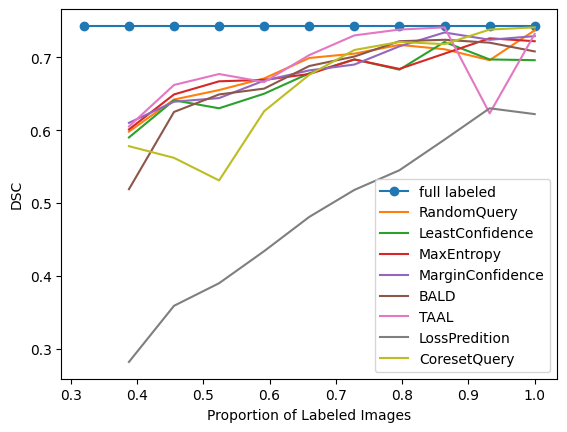

In [313]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(fully_x, fully_y, label="full labeled", marker="o")
ax.plot(random_x[1:], random_y, label="RandomQuery")
ax.plot(leastconfidence_x[1:], leastconfidence_y, label="LeastConfidence")
ax.plot(maxentropy_x[1:], maxentropy_y, label="MaxEntropy")
ax.plot(marginconfidence_x[1:], marginconfidence_y, label="MarginConfidence")
ax.plot(BALD_x[1:], BALD_y, label="BALD")
ax.plot(TTA_x[1:], TTA_y, label="TAAL")
ax.plot(LossPred_x[1:], LossPred_y, label="LossPredition")
ax.plot(CoresetQuery_x[1:], CoresetQuery_y, label="CoresetQuery")
ax.set_xlabel("Proportion of Labeled Images")
ax.set_ylabel("DSC")
ax.legend()
plt.show()

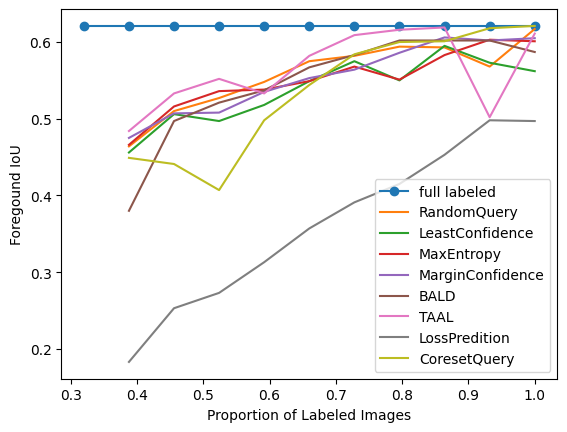

In [320]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(fully_x_iou, fully_y_iou, label="full labeled", marker="o")
ax.plot(random_x_iou[1:], random_y_iou, label="RandomQuery")
ax.plot(leastconfidence_x_iou[1:], leastconfidence_y_iou, label="LeastConfidence")
ax.plot(maxentropy_x_iou[1:], maxentropy_y_iou, label="MaxEntropy")
ax.plot(marginconfidence_x_iou[1:], marginconfidence_y_iou, label="MarginConfidence")
ax.plot(BALD_x_iou[1:], BALD_y_iou, label="BALD")
ax.plot(TTA_x_iou[1:], TTA_y_iou, label="TAAL")
ax.plot(LossPred_x_iou[1:], LossPred_y_iou, label="LossPredition")
ax.plot(CoresetQuery_x_iou[1:], CoresetQuery_y_iou, label="CoresetQuery")
ax.set_xlabel("Proportion of Labeled Images")
ax.set_ylabel("Foregound IoU")
ax.legend()
plt.show()

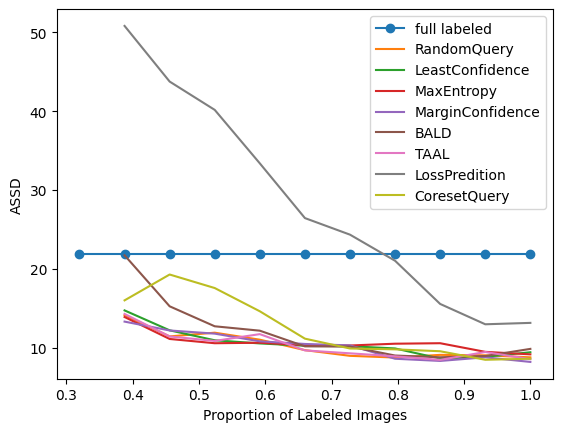

In [321]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(fully_x_assd, fully_y_assd, label="full labeled", marker="o")
ax.plot(random_x_assd[1:], random_y_assd, label="RandomQuery")
ax.plot(leastconfidence_x_assd[1:], leastconfidence_y_assd, label="LeastConfidence")
ax.plot(maxentropy_x_assd[1:], maxentropy_y_assd, label="MaxEntropy")
ax.plot(marginconfidence_x_assd[1:], marginconfidence_y_assd, label="MarginConfidence")
ax.plot(BALD_x_assd[1:], BALD_y_assd, label="BALD")
ax.plot(TTA_x_assd[1:], TTA_y_assd, label="TAAL")
ax.plot(LossPred_x_assd[1:], LossPred_y_assd, label="LossPredition")
ax.plot(CoresetQuery_x_assd[1:], CoresetQuery_y_assd, label="CoresetQuery")
ax.set_xlabel("Proportion of Labeled Images")
ax.set_ylabel("ASSD")
ax.legend()
plt.show()

In [35]:
import pandas as pd

In [36]:
dt = {}
dataset_test = Dataset3d(folder="data/test")

dataloader = torch.utils.data.DataLoader(dataset_test,
                                         batch_size=1,
                                         persistent_workers=True,
                                         pin_memory=True,
                                         prefetch_factor=4,
                                         num_workers=4)


In [37]:
dt["method"] = ["RandomQuery", "leastconfidence", "maxentropy", "marginconfidence", "BALD", "TAAL", "CoresetQuery",
                "LossPredictionQuery"]
dt["DSC"] = []
dt["Foreground IoU"] = []
dt["ASSD"] = []

In [38]:
folder = "/home/yeep/桌面/"
for method in dt["method"]:
    ckpath = sorted(os.listdir(f"{folder}/{method}"), key=lambda x: int(x.split("&")[0].split("=")[1]))[6]
    if method == "BALD":
        model = UNetWithDropout(1, 2, 16).to("cuda")
    else:
        model = UNet(1, 2, 16).to("cuda")
    model.load_state_dict(torch.load(f"{folder}/{method}/{ckpath}"))
    model.eval()
    dice_his, mean_iou_his, assd_hist = test(model, dataloader, 32, 416)
    dice_mean, dice_std = np.mean(dice_his), np.std(dice_his)
    meaniou, mean_std = np.mean(mean_iou_his), np.std(mean_iou_his)
    assd_mean, assd_std = np.mean(assd_hist), np.std(assd_hist)
    print(dice_mean)
    dt["DSC"].append(f"{dice_mean:.3f} ± {dice_std:.3f}")
    dt["Foreground IoU"].append(f"{meaniou:.3f} ± {mean_std:.3f}")
    dt["ASSD"].append(f"{assd_mean:.3f} ± {assd_std:.3f}")

Test | Dice:0.738 Mean IoU: 0.63 asd: 15.71 : 100%|██████████| 15/15 [00:19<00:00,  1.29s/it]


0.72622496


Test | Dice:0.678 Mean IoU: 0.54 asd: 13.29 : 100%|██████████| 15/15 [00:19<00:00,  1.27s/it]


0.711271


Test | Dice:0.646 Mean IoU: 0.52 asd: 18.95 : 100%|██████████| 15/15 [00:18<00:00,  1.25s/it]


0.6996838


Test | Dice:0.730 Mean IoU: 0.60 asd: 12.62 : 100%|██████████| 15/15 [00:18<00:00,  1.25s/it]


0.72193706


Test | Dice:0.714 Mean IoU: 0.60 asd: 16.60 : 100%|██████████| 15/15 [00:18<00:00,  1.25s/it]


0.7234763


Test | Dice:0.664 Mean IoU: 0.55 asd: 19.49 : 100%|██████████| 15/15 [00:17<00:00,  1.18s/it]


0.7392386


Test | Dice:0.747 Mean IoU: 0.63 asd: 9.71 : 100%|██████████| 15/15 [00:18<00:00,  1.25s/it] 


0.7385094


Test | Dice:0.630 Mean IoU: 0.49 asd: 23.76 : 100%|██████████| 15/15 [00:19<00:00,  1.29s/it]

0.49247602


In [39]:
dt

{'method': ['RandomQuery',
  'leastconfidence',
  'maxentropy',
  'marginconfidence',
  'BALD',
  'TAAL',
  'CoresetQuery',
  'LossPredictionQuery'],
 'DSC': ['0.726 ± 0.104',
  '0.711 ± 0.087',
  '0.700 ± 0.087',
  '0.722 ± 0.086',
  '0.723 ± 0.089',
  '0.739 ± 0.090',
  '0.739 ± 0.088',
  '0.492 ± 0.128'],
 'Foreground IoU': ['0.608 ± 0.114',
  '0.583 ± 0.093',
  '0.574 ± 0.092',
  '0.599 ± 0.093',
  '0.607 ± 0.100',
  '0.622 ± 0.100',
  '0.619 ± 0.104',
  '0.366 ± 0.114'],
 'ASSD': ['9.837 ± 4.621',
  '9.226 ± 3.751',
  '10.388 ± 4.369',
  '9.525 ± 3.891',
  '11.259 ± 4.229',
  '8.553 ± 4.424',
  '9.179 ± 3.645',
  '27.604 ± 12.646']}

In [40]:
pd.DataFrame(dt).to_excel("2.xlsx", index=None)

In [368]:
!pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 1.3 MB/s eta 0:00:00a 0:00:01


In [370]:
model = UNet(1, 2, 16).to("cuda")
model.load_state_dict(torch.load(f"/home/yeep/桌面/fulllabeled/epoch=140&dice=0.856&time=1681636603.6206586.pth"))
model.eval()
dice_his, mean_iou_his, assd_hist = test(model, dataloader, 32, 416)
dice_mean, dice_std = round(dice_his.mean(), 3), round(dice_his.mean(), 3)
meaniou, mean_std = round(mean_iou_his.mean(), 3), round(mean_iou_his.mean(), 3)
assd_mean, assd_std = round(assd_hist.mean(), 3), round(assd_hist.mean(), 3)

  0%|          | 0/15 [00:00<?, ?it/s]/home/yeep/env/miniconda/envs/pymic_al/lib/python3.8/site-packages/monai/metrics/surface_distance.py:161: UserWarning: the ground truth of class 0 is all 0, this may result in nan/inf distance.
  warnings.warn(f"the ground truth of class {c} is all 0, this may result in nan/inf distance.")
Test | Dice:0.732 Mean IoU: 0.62 asd: 15.93 : 100%|██████████| 15/15 [00:19<00:00,  1.30s/it]


In [371]:
dice_mean, dice_std

(0.721, 0.096)

In [372]:
meaniou, mean_std

(0.602, 0.106)

In [373]:
assd_mean, assd_std

(10.225, 3.515)

In [20]:
a = round(1 / 3, 3)

In [22]:
f"{a}"

'0.333'

In [3]:
import torch

type(torch.randn(3, 3, 9).data)

torch.Tensor

In [78]:
import numpy as np

In [89]:
a = np.random.random(10)

In [90]:
a = np.random.random((2601, 2)).tolist()

In [91]:
selections = []

In [92]:
query_num = 200
for s in range(0, len(a), query_num):
    end = s + query_num
    if end >= len(a):
        end = None
    selections.append(a[s: end])

In [120]:
a = list(map(lambda x: np.sum(x, axis=0)[1], selections))

In [123]:
np.asarray(selections[np.argmax(a)])[:, 0].tolist()

[0.7787196582335485,
 0.24707822499643073,
 0.18208320154620372,
 0.6381477336574702,
 0.23251208110815502,
 0.7063877935622004,
 0.9282808217631271,
 0.8616233667289996,
 0.8002492609049635,
 0.09410342034078556,
 0.426279769055541,
 0.3624653221436781,
 0.8985866509611086,
 0.2422926012444072,
 0.6174008737216925,
 0.4304567220248573,
 0.26920657552526084,
 0.07708350701185751,
 0.2298936260477773,
 0.3711265895303312,
 0.6018182273906718,
 0.26094041990829453,
 0.8259579004683406,
 0.06475619882179928,
 0.5148914045651972,
 0.9119749338228573,
 0.5894902360404184,
 0.626248972197148,
 0.8759421007182339,
 0.8367235775778009,
 0.0593265316338949,
 0.9728629762011098,
 0.08757128744273435,
 0.22308949764962138,
 0.07592111283893188,
 0.7375241422747216,
 0.1878625653249445,
 0.04940988209918906,
 0.9113598107265791,
 0.9037288679371737,
 0.04320523098693396,
 0.4116731918453269,
 0.16390964330685187,
 0.891396599168811,
 0.47544499937609597,
 0.780417158048267,
 0.8810013919857183,
 0

In [127]:
np.uint64

numpy.uint64

In [ ]:
import numpy as np
import torch
import SimpleITK as sitk

In [ ]:
niiobj = sitk.GetArrayFromImage(sitk.ReadImage(
    "/home/yeep/project/py/ALSph2d/data/val/image/201404260019_t1_fs_tse_rs_tra_0_0_0_axial_20140429.nii.gz"))

In [ ]:
niiobj = (niiobj - niiobj.mean()) / niiobj.std()

In [ ]:
niiobj.shape

In [ ]:
mean = torch.mean(torch.tensor(niiobj), (1, 2))
std = torch.std(torch.tensor(niiobj), (1, 2))

In [ ]:
(torch.from_numpy(niiobj) - mean) / std

In [ ]:
torchnii = torch.from_numpy(niiobj)

In [ ]:
torchnii - mean

In [ ]:
a = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
a.log_softmax(dim=0)

In [ ]:
a = torch.randn(15, 2, 8, 8)
b = a.log_softmax(dim=1)

In [ ]:
a = torch.randn(5)
b = torch.randn(4, 3)

In [ ]:
torch.matmul(a, b)

In [ ]:
import numpy as np

a = torch.randn(16, 2, 10, 10).softmax(dim=1)
spacing32 = np.spacing(1, dtype=np.float32)

In [ ]:
torch.abs(a[:, 0] - a[:, 1]).mean(dim=[-2, -1]).shape

In [ ]:
torch.mean(-a * torch.log(1e-12 + a), dim=[1, 2, 3]) * 2

In [ ]:
out = torch.mean(-a * torch.log(a + 1e-12), dim=[1, 2, 3]) * 2

In [ ]:
torch.column_stack([torch.arange(0, a.shape[0], dtype=torch.int), out]).data

In [ ]:
def cal_entropy_score(probs):  # C,H,W  熵越大，越难分
    batch_scores = []
    for i in range(len(probs)):  # prob img
        entropy = np.mean(-np.nansum(np.multiply(probs[i], np.log(probs[i] + 1e-12)), axis=0))  # 表示沿着第1维计算
        batch_scores.append(entropy)
    return batch_scores

In [ ]:
a.log()

In [ ]:
import torch.nn as nn
import torch

In [ ]:
a = nn.Dropout()

In [ ]:
a(torch.ones(16, 8, 8))

In [ ]:
import torch
import numpy as np

In [ ]:
a = torch.randn(1, 16, 16)
b = torch.randn(1, 16, 16)

In [ ]:
torch.concat([a, b]).shape

In [ ]:
torch.stack([a, b]).shape

In [ ]:
data = torch.randn(10, 16, 2, 10, 10)

In [ ]:
data

In [ ]:
a.mean(0).shape

In [ ]:
SPACING32 = np.spacing(1, dtype=np.float32)
SPACING32

In [ ]:
data = torch.randint(0, 200, size=(10, 16, 2, 10, 10), dtype=torch.float32).softmax(dim=2)

In [ ]:
mean = data.mean(0)

In [ ]:
mean_entropy = -torch.mean(mean * torch.log(mean + SPACING32), dim=[-3, -2, -1])

In [ ]:
mean_entropy

In [ ]:
torch.mean(torch.mean(-data * torch.log(data + SPACING32), dim=[-3, -2, -1]), dim=0)

In [ ]:
torch.mean(-data * torch.log(data + SPACING32), dim=[0, -3, -2, -1])

In [ ]:
import torchvision.transforms as T

In [ ]:
class AddGaussianNoise(object):
    def __init__(self, mean=0., std=1.):
        self.std = std
        self.mean = mean

    def __call__(self, tensor):
        tensor = tensor.detach().cpu()
        noise = torch.randn(tensor.size())
        return tensor + noise * self.std + self.mean

    def __repr__(self):
        return self.__class__.__name__ + '(mean={0}, std={1})'.format(self.mean, self.std)

In [ ]:
def augment_data(img, flip=0, n_rotation=0, flip_axis=2, rot_axis0=2, rot_axis1=3, jitter=0, blur=1, mean_gaussian=0,
                 std_gaussian=0):
    """
    We apply the given transformation (flip and rotation) on the input image
    :param flip: [0 or 1] flip applied as the initial transformation
    :param flip: [0, 1, 2, 3] number of rotations applied as the initial transformation
    :param jitter:  (same) value for amount of brightness, contrast, saturation and hue jitter.
                    The factor will be uniformly from [max(0, 1 - value), 1 + value],
                    except for hue value which will be chosen between  0.5 < =[-value, value] <= 0.5
    :param blur: (same) value of kernel size and sigma for Gaussian blur. Kernel will have shape (value, value)
                 Sigma will be chosen uniformly at random between 0.1 and that value.
    """
    if flip != 0:
        img = torch.flip(img, [flip_axis])

    if n_rotation != 0:
        img = torch.rot90(img, n_rotation, [rot_axis0, rot_axis1])

    if jitter != 0:
        transform = T.ColorJitter(brightness=jitter, contrast=jitter, saturation=jitter, hue=jitter)
        img = transform(img)

    if blur != 1:
        transform = T.GaussianBlur(kernel_size=(blur, blur), sigma=(0.1, blur))
        img = transform(img)

    if mean_gaussian != 0 or std_gaussian != 0:
        transform = AddGaussianNoise(mean_gaussian, std_gaussian)
        img = transform(img)

    return img

In [ ]:
import random

In [ ]:

def random_augmentation(x, aug_dic=None, flip_axis=2, rotaxis0=2, rotaxis1=3, aug_gaussian_mean=0, aug_gaussian_std=0):
    """ We do augmentation (flip, rotation, mult(0.9 - 1.1)
    :param x: a tensor of shape (#channels, x, y) or (#channels, x, y, z)
    :param aug_dic: augmentation dictionary (if given)
    :param flip_axis: tensor axis for flipping
    :param rotaxis0: tensor first axis of rotation
    :param rotaxis1: tensor second axis of rotation
    :param type: type of input ('img' or 'target'). If 'target', no jitter or blurring will be applied
    """
    if aug_dic is None:
        # We get params for number of flips (0 or 1) and number of rotations (0 ro 3)
        flip = torch.randint(0, 2, (1,)).item() if random.random() > 0.5 else 0
        num_rot = torch.randint(0, 4, (1,)).item() if random.random() > 0.5 else 0

        # We define the same value for amount of brightness, contrast, saturation and hue jitter.
        # The factor will be uniformly from [max(0, 1 - value), 1 + value],
        # except for hue value which will be chosen between  0.5 < =[-value, value] <= 0.5
        jitter = 0.5 if random.random() > 0.5 else 0

        # We define the same value for kernel size and max sigma.
        # Sigma will be chosen uniformly at random between (0.1, value)
        blur = 3 if random.random() > 0.5 else 1

        mean_gaussian = aug_gaussian_mean if random.random() > 0.5 else 0
        std_gaussian = aug_gaussian_std if random.random() > 0.5 else 0

        aug_dic = {'flip': flip,
                   'rot': num_rot,
                   'jitter': jitter,
                   'blur': blur,
                   'mean_gaussian': mean_gaussian,
                   'std_gaussian': std_gaussian
                   }
    else:
        flip = aug_dic['flip']
        num_rot = aug_dic['rot']

        # If it is a target image, there will be no jitter and bluring transformation
        jitter = 0 if type == 'target' else aug_dic['jitter']
        blur = 1 if type == 'target' else aug_dic['blur']
        mean_gaussian = 0 if type == 'target' else aug_dic['mean_gaussian']
        std_gaussian = 0 if type == 'target' else aug_dic['std_gaussian']

    # We apply the transformations
    x_aug = augment_data(x, flip=flip, n_rotation=num_rot, flip_axis=flip_axis, rot_axis0=rotaxis0, rot_axis1=rotaxis1,
                         jitter=jitter, blur=blur, mean_gaussian=mean_gaussian, std_gaussian=std_gaussian)

    return x_aug, aug_dic

In [ ]:
def reverse_augment_data(img, flip=0, n_rotation=0, flip_axis=2, rot_axis0=2, rot_axis1=3):
    """
    We reverse the transformation (flip and rotation) of the given image
    :param flip: [0 or 1] flip applied as the initial transformation
    :param flip: [0, 1, 2, 3] number of rotations applied as the initial transformation
    """
    if n_rotation != 0:
        img = torch.rot90(img, 4 - n_rotation, [rot_axis0, rot_axis1])

    if flip != 0:
        img = torch.flip(img, [flip_axis])

    return img

In [ ]:
import torch
import os
import numpy as np
from os.path import join, exists
import SimpleITK as sitk
from torch.utils.data import Dataset, SubsetRandomSampler
from PIL import Image
import albumentations as A

In [ ]:
class Dataset2d(Dataset):
    def __init__(self, datafolder: str, transform=None) -> None:
        assert os.path.exists(datafolder), datafolder
        super().__init__()
        self.data_folder = datafolder
        self.transforms = transform
        assert exists(datafolder)
        assert exists((join(datafolder, "image")))
        self.jpg_data = os.listdir(os.path.join(datafolder, "image"))

    def __len__(self):
        return len(self.jpg_data)

    def __getitem__(self, index):
        data_name = label_name = self.jpg_data[index]
        data_path, label_path = join(self.data_folder, "image", data_name), join(self.data_folder, "label", label_name)
        data, label = Image.open(data_path).convert("L"), Image.open(label_path).convert("L")
        data, label = np.asarray(data, dtype=np.float32), np.asarray(label, dtype=np.uint8)
        data = (data - data.mean()) / data.std()
        if self.transforms is not None:
            transformed = self.transforms(image=data, mask=label)
            data, label = transformed["image"], transformed["mask"]

        return torch.tensor(data, dtype=torch.float32).unsqueeze(0), torch.tensor(label == 255,
                                                                                  dtype=torch.long).unsqueeze(0)

In [ ]:
train_transform = A.Compose([A.PadIfNeeded(512, 512), A.CropNonEmptyMaskIfExists(416, 416, p=1)])
train_dataset = Dataset2d(datafolder=os.path.join("data", "train"), transform=train_transform)

In [ ]:
dulabeled = torch.utils.data.DataLoader(train_dataset,
                                        batch_size=16,
                                        pin_memory=True,
                                        num_workers=0)

In [ ]:
img, label = next(iter(dulabeled))

In [ ]:
img.shape

In [ ]:
aug_img = random_augmentation(img)

In [ ]:
from torchvision.utils import save_image

In [ ]:
save_image(img, "1.jpg", normalize=True)
save_image(aug_img[0], "2.jpg", normalize=True)

In [ ]:
aug_img[1]

In [ ]:
random.random()

In [ ]:
import torch

In [ ]:
a = torch.randn(1, 10, requires_grad=True)

In [ ]:
b = []
with torch.no_grad():
    c = a + 1

In [ ]:
c.grad_fn

In [ ]:
d = c + 2

In [ ]:
d.grad_fn

In [ ]:
a = [1, 2, 3, 4, 5]
sorted(a, reverse=True)

In [ ]:
def LossPredLoss(input, target, margin=1.0, reduction='mean'):
    assert len(input) % 2 == 0, 'the batch size is not even.'
    assert input.shape == input.flip(0).shape

    input = (input - input.flip(0))[
            :len(input) // 2]  # [l_1 - l_2B, l_2 - l_2B-1, ... , l_B - l_B+1], where batch_size = 2B
    target = (target - target.flip(0))[:len(target) // 2]
    target = target.detach()

    one = 2 * torch.sign(torch.clamp(target, min=0)) - 1  # 1 operation which is defined by the authors

    if reduction == 'mean':
        loss = torch.sum(torch.clamp(margin - one * input, min=0))
        loss = loss / input.size(0)  # Note that the size of input is already halved
    elif reduction == 'none':
        loss = torch.clamp(margin - one * input, min=0)
    else:
        NotImplementedError()

    return loss

In [ ]:
from monai.losses import DiceLoss
import torch

In [ ]:
criterion = DiceLoss(include_background=True, reduction="none")
pred = torch.randn(16, 2, 416, 416, device="cuda")

In [ ]:
label = torch.randn(16, 2, 416, 416, device="cuda") > 0.5

In [ ]:
dice = criterion(pred, label)
dice = dice.view((dice.shape[0]))

In [ ]:
dice.shape

In [ ]:

loss_pred_module = torch.nn.Linear(128, 1).cuda()

In [ ]:
a = loss_pred_module(torch.randn(16, 128, device="cuda"))

In [ ]:
a = a.view((a.shape[0],))
a.shape

In [ ]:
c = LossPredLoss(a, dice)

In [ ]:
c

In [ ]:
loss

In [ ]:
c.grad_fn

In [ ]:
a.flip(0).shape

In [ ]:
a.shape

In [ ]:
torch.arange(1, 10).flip(0)

In [ ]:
torch.view

In [ ]:
label = torch.randn(16, 2, 416, 416, device="cuda") > 0.5

In [ ]:
label[..., 1]

In [ ]:
[..., dec] = label

In [ ]:
import torch

In [ ]:
from sklearn.metrics import pairwise_distances

In [ ]:
l1 = torch.randn(16, 128)
l2 = torch.randn(8, 128)

In [ ]:
pairwise_distances(l1, l2).shape

In [ ]:
import torch

In [ ]:
a = torch.randn(16, 2)

In [ ]:
for i in map(lambda x: x[1], a):
    print(i)

In [ ]:
from model import UNet
import torch
from dataset.SphDataset import Dataset3d
import numpy as np
from tqdm import tqdm
from util import label_smooth
from monai.networks.utils import one_hot
from monai.metrics import Cumulative, DiceMetric, MeanIoU, SurfaceDistanceMetric
from util.trainer import NoInfSurfaceDistanceMetric
from scipy.ndimage import zoom


@torch.no_grad()
def test(model: torch.nn.Module, dataloader, batch_size, input_size):
    device = next(iter(model.parameters())).device
    dice_metric, meaniou_metric, assd_metric = DiceMetric(include_background=False), MeanIoU(
        include_background=False), NoInfSurfaceDistanceMetric(include_background=False, symmetric=True)
    model.eval()
    tbar = tqdm(dataloader)
    dice_his, mean_iou_his, assd_hist = [], [], []
    for idx, (img, mask) in enumerate(tbar):
        dice_metric.reset()
        meaniou_metric.reset()
        assd_metric.reset()
        pred_volume = np.empty((0, img.shape[-2], img.shape[-1]), dtype=np.float32)
        img, mask = img[0], mask[0]
        h, w = img.shape[-2], img.shape[-1]
        for batch in range(0, img.shape[0], batch_size):
            last = batch + batch_size
            batch_slices = img[batch:] if last >= img.shape[0] else img[batch:last]

            batch_slices = zoom(batch_slices, (1, 1, input_size / h, input_size / w), order=0,
                                mode='nearest')
            batch_slices = torch.from_numpy(batch_slices).to(device)
            output = model(batch_slices)
            if isinstance(output, tuple):
                output = output[0]
            batch_pred_mask = output.argmax(dim=1).cpu()
            batch_pred_mask = zoom(batch_pred_mask, (1, h / input_size, w / input_size), order=0,
                                   mode='nearest')
            pred_volume = np.concatenate([pred_volume, batch_pred_mask])
            torch.cuda.empty_cache()

        mask_onehot = one_hot(mask, 2)
        volume_pred_mask = torch.from_numpy(label_smooth(pred_volume)).unsqueeze(1)
        dice = dice_metric(y_pred=volume_pred_mask, y=mask_onehot)
        iou = meaniou_metric(y_pred=volume_pred_mask, y=mask_onehot)
        assd = assd_metric(y_pred=volume_pred_mask, y=mask_onehot)
        dice, iou = dice[dice.isnan() == 0].mean(), iou[iou.isnan() == 0].mean()
        assd = assd[(assd.isnan() == 0) & assd.isfinite()].mean()
        tbar.set_description(
            f"Test | Dice:{dice:.3f} Mean IoU: {iou:.2f} asd: {assd:.2f} ")
        dice_his.append(dice)
        mean_iou_his.append(iou)
        assd_hist.append(assd)
    return np.array(dice_his), np.array(mean_iou_his), np.array(assd_hist)

In [ ]:
import os
from model.Unet import *
from model.Unet import UNetWithDropout

In [ ]:
folder = "/home/yeep/桌面/forgetweight/"
ckpath = sorted(os.listdir(folder), key=lambda x: int(x.split("&")[0].split("=")[1]))

In [ ]:
dataset_val = Dataset3d(folder="data/val")

dataloader = torch.utils.data.DataLoader(dataset_val,
                                         batch_size=1,
                                         persistent_workers=True,
                                         pin_memory=True,
                                         prefetch_factor=4,
                                         num_workers=4)

dice, iou, assd = [], [], []
for p in ckpath:
    model = UNet(1, 2, 16).to("cuda")
    model.load_state_dict(torch.load(f"{folder}/{p}"))
    model.eval()
    dice_his, mean_iou_his, assd_hist = test(model, dataloader, 32, 416)
    dice.append(round(np.mean(dice_his), 3))
    iou.append(round(np.mean(mean_iou_his), 3))
    assd.append(round(np.mean(assd_hist), 3))

In [ ]:
dice

In [ ]:
fully_x = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
fully_y = [0.743, 0.743, 0.743, 0.743, 0.743, 0.743, 0.743, 0.743, 0.743, 0.743, 0.743]

random_x = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
random_y = [0.598, 0.642, 0.655, 0.671, 0.699, 0.705, 0.717, 0.711, 0.696, 0.737]

leastconfidence_x = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
leastconfidence_y = [0.59, 0.641, 0.63, 0.65, 0.678, 0.697, 0.683, 0.721, 0.697, 0.696]

maxentropy_x = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
maxentropy_y = [0.601, 0.649, 0.667, 0.669, 0.677, 0.697, 0.684, 0.705, 0.726, 0.722]

marginconfidence_x = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
marginconfidence_y = [0.61, 0.639, 0.644, 0.668, 0.682, 0.69, 0.715, 0.734, 0.724, 0.729]

BALD_x = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
BALD_y = [0.519, 0.625, 0.649, 0.657, 0.688, 0.701, 0.722, 0.724, 0.72, 0.708]

TTA_x = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
TTA_y = [0.605, 0.662, 0.677, 0.666, 0.703, 0.73, 0.738, 0.741, 0.623, 0.732]

LossPred_x = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
LossPred_y = [0.282, 0.359, 0.39, 0.434, 0.481, 0.518, 0.545, 0.587, 0.63, 0.622]

CoresetQuery_x = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
CoresetQuery_y = [0.578, 0.562, 0.531, 0.626, 0.676, 0.71, 0.721, 0.718, 0.738, 0.741]

In [ ]:
fully_x_iou = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
fully_y_iou = [0.621, 0.621, 0.621, 0.621, 0.621, 0.621, 0.621, 0.621, 0.621, 0.621, 0.621]

random_x_iou = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
random_y_iou = [0.464, 0.51, 0.527, 0.548, 0.575, 0.582, 0.594, 0.593, 0.568, 0.617]

leastconfidence_x_iou = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
leastconfidence_y_iou = [0.456, 0.506, 0.497, 0.518, 0.549, 0.575, 0.55, 0.595, 0.573, 0.562]

maxentropy_x_iou = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
maxentropy_y_iou = [0.466, 0.516, 0.536, 0.538, 0.549, 0.568, 0.551, 0.583, 0.603, 0.601]

marginconfidence_x_iou = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932,
                          1.0]
marginconfidence_y_iou = [0.475, 0.507, 0.508, 0.535, 0.553, 0.564, 0.586, 0.606, 0.602, 0.605]

BALD_x_iou = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
BALD_y_iou = [0.38, 0.497, 0.521, 0.537, 0.567, 0.583, 0.602, 0.602, 0.602, 0.587]

TTA_x_iou = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
TTA_y_iou = [0.484, 0.533, 0.552, 0.533, 0.582, 0.609, 0.616, 0.619, 0.502, 0.611]

LossPred_x_iou = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
LossPred_y_iou = [0.183, 0.253, 0.273, 0.313, 0.357, 0.391, 0.415, 0.453, 0.498, 0.497]

CoresetQuery_x_iou = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
CoresetQuery_y_iou = [0.449, 0.441, 0.407, 0.498, 0.544, 0.584, 0.6, 0.601, 0.618, 0.621]

In [ ]:
fully_x_assd = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
fully_y_assd = [21.871, 21.871, 21.871, 21.871, 21.871, 21.871, 21.871, 21.871, 21.871, 21.871, 21.871]

random_x_assd = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
random_y_assd = [14.161, 11.467, 11.937, 11.051, 9.726, 9.004, 8.788, 9.127, 9.07, 8.814]

leastconfidence_x_assd = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932,
                          1.0]
leastconfidence_y_assd = [14.759, 12.236, 10.975, 10.577, 10.282, 10.224, 9.94, 8.656, 8.881, 9.458]

maxentropy_x_assd = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
maxentropy_y_assd = [13.923, 11.141, 10.602, 10.663, 10.365, 10.314, 10.541, 10.603, 9.508, 9.192]

marginconfidence_x_assd = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932,
                           1.0]
marginconfidence_y_assd = [13.341, 12.217, 11.817, 10.842, 10.509, 10.328, 8.635, 8.359, 8.816, 8.233]

BALD_x_assd = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
BALD_y_assd = [21.744, 15.28, 12.748, 12.192, 10.205, 10.179, 9.043, 8.822, 8.981, 9.885]

TTA_x_assd = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
TTA_y_assd = [14.309, 11.462, 10.891, 11.755, 9.693, 9.322, 8.941, 8.492, 9.489, 8.582]

LossPred_x_assd = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
LossPred_y_assd = [50.801, 43.752, 40.165, 33.394, 26.456, 24.356, 21.049, 15.579, 13.002, 13.179]

CoresetQuery_x_assd = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
CoresetQuery_y_assd = [16.033, 19.307, 17.594, 14.651, 11.181, 9.934, 9.827, 9.586, 8.505, 8.639]

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(fully_x, fully_y, label="full labeled", marker="o")
ax.plot(random_x[1:], random_y, label="RandomQuery")
ax.plot(leastconfidence_x[1:], leastconfidence_y, label="LeastConfidence")
ax.plot(maxentropy_x[1:], maxentropy_y, label="MaxEntropy")
ax.plot(marginconfidence_x[1:], marginconfidence_y, label="MarginConfidence")
ax.plot(BALD_x[1:], BALD_y, label="BALD")
ax.plot(TTA_x[1:], TTA_y, label="TAAL")
ax.plot(LossPred_x[1:], LossPred_y, label="LossPredition")
ax.plot(CoresetQuery_x[1:], CoresetQuery_y, label="CoresetQuery")
ax.set_xlabel("Proportion of Labeled Images")
ax.set_ylabel("DSC")
ax.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(fully_x_iou, fully_y_iou, label="full labeled", marker="o")
ax.plot(random_x_iou[1:], random_y_iou, label="RandomQuery")
ax.plot(leastconfidence_x_iou[1:], leastconfidence_y_iou, label="LeastConfidence")
ax.plot(maxentropy_x_iou[1:], maxentropy_y_iou, label="MaxEntropy")
ax.plot(marginconfidence_x_iou[1:], marginconfidence_y_iou, label="MarginConfidence")
ax.plot(BALD_x_iou[1:], BALD_y_iou, label="BALD")
ax.plot(TTA_x_iou[1:], TTA_y_iou, label="TAAL")
ax.plot(LossPred_x_iou[1:], LossPred_y_iou, label="LossPredition")
ax.plot(CoresetQuery_x_iou[1:], CoresetQuery_y_iou, label="CoresetQuery")
ax.set_xlabel("Proportion of Labeled Images")
ax.set_ylabel("Foregound IoU")
ax.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(fully_x_assd, fully_y_assd, label="full labeled", marker="o")
ax.plot(random_x_assd[1:], random_y_assd, label="RandomQuery")
ax.plot(leastconfidence_x_assd[1:], leastconfidence_y_assd, label="LeastConfidence")
ax.plot(maxentropy_x_assd[1:], maxentropy_y_assd, label="MaxEntropy")
ax.plot(marginconfidence_x_assd[1:], marginconfidence_y_assd, label="MarginConfidence")
ax.plot(BALD_x_assd[1:], BALD_y_assd, label="BALD")
ax.plot(TTA_x_assd[1:], TTA_y_assd, label="TAAL")
ax.plot(LossPred_x_assd[1:], LossPred_y_assd, label="LossPredition")
ax.plot(CoresetQuery_x_assd[1:], CoresetQuery_y_assd, label="CoresetQuery")
ax.set_xlabel("Proportion of Labeled Images")
ax.set_ylabel("ASSD")
ax.legend()
plt.show()

In [ ]:
import pandas as pd

In [ ]:
dt = {}
dataset_test = Dataset3d(folder="data/test")

dataloader = torch.utils.data.DataLoader(dataset_test,
                                         batch_size=1,
                                         persistent_workers=True,
                                         pin_memory=True,
                                         prefetch_factor=4,
                                         num_workers=4)


In [ ]:
dt["method"] = ["RandomQuery", "leastconfidence", "maxentropy", "marginconfidence", "BALD", "TAAL", "CoresetQuery",
                "LossPredictionQuery"]
dt["DSC"] = []
dt["Foreground IoU"] = []
dt["ASSD"] = []

In [ ]:
folder = "/home/yeep/桌面/"
for method in dt["method"]:
    ckpath = sorted(os.listdir(f"{folder}/{method}"), key=lambda x: int(x.split("&")[0].split("=")[1]))[6]
    if method == "BALD":
        model = UNetWithDropout(1, 2, 16).to("cuda")
    else:
        model = UNet(1, 2, 16).to("cuda")
    model.load_state_dict(torch.load(f"{folder}/{method}/{ckpath}"))
    model.eval()
    dice_his, mean_iou_his, assd_hist = test(model, dataloader, 32, 416)
    dice_mean, dice_std = np.mean(dice_his), np.std(dice_his)
    meaniou, mean_std = np.mean(mean_iou_his), np.std(mean_iou_his)
    assd_mean, assd_std = np.mean(assd_hist), np.std(assd_hist)
    print(dice_mean)
    dt["DSC"].append(f"{dice_mean:.3f} ± {dice_std:.3f}")
    dt["Foreground IoU"].append(f"{meaniou:.3f} ± {mean_std:.3f}")
    dt["ASSD"].append(f"{assd_mean:.3f} ± {assd_std:.3f}")

In [ ]:
dt

In [ ]:
pd.DataFrame(dt).to_excel("2.xlsx", index=None)

In [ ]:
!pip install openpyxl

In [ ]:
model = UNet(1, 2, 16).to("cuda")
model.load_state_dict(torch.load(f"/home/yeep/桌面/fulllabeled/epoch=140&dice=0.856&time=1681636603.6206586.pth"))
model.eval()
dice_his, mean_iou_his, assd_hist = test(model, dataloader, 32, 416)
dice_mean, dice_std = round(np.mean(dice_his), 3), round(np.std(dice_his), 3)
meaniou, mean_std = round(np.mean(mean_iou_his), 3), round(np.std(mean_iou_his), 3)
assd_mean, assd_std = round(np.mean(assd_hist), 3), round(np.std(assd_hist), 3)

In [ ]:
dice_mean, dice_std

In [ ]:
meaniou, mean_std

In [ ]:
assd_mean, assd_std

In [ ]:
a = round(1 / 3, 3)

In [ ]:
f"{a}"

In [ ]:
import torch

type(torch.randn(3, 3, 9).data)

In [ ]:
import numpy as np

In [ ]:
a = np.random.random(10)

In [ ]:
a = np.random.random((2601, 2))

In [ ]:
selections = a.size // 200

In [ ]:
if selections * 200 < a.size:
    selections += 1

In [ ]:
selections = []

In [ ]:
query_num = 200
for s in range(0, a.size, query_num):
    end = s + 200
    if end >= a.sze:
        end = -1
    selections.append(a[s, :])


In [128]:
from sklearn.metrics import pairwise_distances

In [ ]:
labeled = np.random.random((100, 1024))
unlabeled = np.random.random((100, 1024))  #%%
import numpy as np
import torch
import SimpleITK as sitk

In [ ]:
niiobj = sitk.GetArrayFromImage(sitk.ReadImage(
    "/home/yeep/project/py/ALSph2d/data/val/image/201404260019_t1_fs_tse_rs_tra_0_0_0_axial_20140429.nii.gz"))

In [ ]:
niiobj = (niiobj - niiobj.mean()) / niiobj.std()

In [ ]:
niiobj.shape

In [ ]:
mean = torch.mean(torch.tensor(niiobj), (1, 2))
std = torch.std(torch.tensor(niiobj), (1, 2))

In [ ]:
(torch.from_numpy(niiobj) - mean) / std

In [ ]:
torchnii = torch.from_numpy(niiobj)

In [ ]:
torchnii - mean

In [ ]:
a = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
a.log_softmax(dim=0)

In [ ]:
a = torch.randn(15, 2, 8, 8)
b = a.log_softmax(dim=1)

In [ ]:
a = torch.randn(5)
b = torch.randn(4, 3)

In [ ]:
torch.matmul(a, b)

In [ ]:
import numpy as np

a = torch.randn(16, 2, 10, 10).softmax(dim=1)
spacing32 = np.spacing(1, dtype=np.float32)

In [ ]:
torch.abs(a[:, 0] - a[:, 1]).mean(dim=[-2, -1]).shape

In [ ]:
torch.mean(-a * torch.log(1e-12 + a), dim=[1, 2, 3]) * 2

In [ ]:
out = torch.mean(-a * torch.log(a + 1e-12), dim=[1, 2, 3]) * 2

In [ ]:
torch.column_stack([torch.arange(0, a.shape[0], dtype=torch.int), out]).data

In [ ]:
def cal_entropy_score(probs):  # C,H,W  熵越大，越难分
    batch_scores = []
    for i in range(len(probs)):  # prob img
        entropy = np.mean(-np.nansum(np.multiply(probs[i], np.log(probs[i] + 1e-12)), axis=0))  # 表示沿着第1维计算
        batch_scores.append(entropy)
    return batch_scores

In [ ]:
a.log()

In [ ]:
import torch.nn as nn
import torch

In [ ]:
a = nn.Dropout()

In [ ]:
a(torch.ones(16, 8, 8))

In [ ]:
import torch
import numpy as np

In [ ]:
a = torch.randn(1, 16, 16)
b = torch.randn(1, 16, 16)

In [ ]:
torch.concat([a, b]).shape

In [ ]:
torch.stack([a, b]).shape

In [ ]:
data = torch.randn(10, 16, 2, 10, 10)

In [ ]:
data

In [ ]:
a.mean(0).shape

In [ ]:
SPACING32 = np.spacing(1, dtype=np.float32)
SPACING32

In [ ]:
data = torch.randint(0, 200, size=(10, 16, 2, 10, 10), dtype=torch.float32).softmax(dim=2)

In [ ]:
mean = data.mean(0)

In [ ]:
mean_entropy = -torch.mean(mean * torch.log(mean + SPACING32), dim=[-3, -2, -1])

In [ ]:
mean_entropy

In [ ]:
torch.mean(torch.mean(-data * torch.log(data + SPACING32), dim=[-3, -2, -1]), dim=0)

In [ ]:
torch.mean(-data * torch.log(data + SPACING32), dim=[0, -3, -2, -1])

In [ ]:
import torchvision.transforms as T

In [ ]:
class AddGaussianNoise(object):
    def __init__(self, mean=0., std=1.):
        self.std = std
        self.mean = mean

    def __call__(self, tensor):
        tensor = tensor.detach().cpu()
        noise = torch.randn(tensor.size())
        return tensor + noise * self.std + self.mean

    def __repr__(self):
        return self.__class__.__name__ + '(mean={0}, std={1})'.format(self.mean, self.std)

In [ ]:
def augment_data(img, flip=0, n_rotation=0, flip_axis=2, rot_axis0=2, rot_axis1=3, jitter=0, blur=1, mean_gaussian=0,
                 std_gaussian=0):
    """
    We apply the given transformation (flip and rotation) on the input image
    :param flip: [0 or 1] flip applied as the initial transformation
    :param flip: [0, 1, 2, 3] number of rotations applied as the initial transformation
    :param jitter:  (same) value for amount of brightness, contrast, saturation and hue jitter.
                    The factor will be uniformly from [max(0, 1 - value), 1 + value],
                    except for hue value which will be chosen between  0.5 < =[-value, value] <= 0.5
    :param blur: (same) value of kernel size and sigma for Gaussian blur. Kernel will have shape (value, value)
                 Sigma will be chosen uniformly at random between 0.1 and that value.
    """
    if flip != 0:
        img = torch.flip(img, [flip_axis])

    if n_rotation != 0:
        img = torch.rot90(img, n_rotation, [rot_axis0, rot_axis1])

    if jitter != 0:
        transform = T.ColorJitter(brightness=jitter, contrast=jitter, saturation=jitter, hue=jitter)
        img = transform(img)

    if blur != 1:
        transform = T.GaussianBlur(kernel_size=(blur, blur), sigma=(0.1, blur))
        img = transform(img)

    if mean_gaussian != 0 or std_gaussian != 0:
        transform = AddGaussianNoise(mean_gaussian, std_gaussian)
        img = transform(img)

    return img

In [ ]:
import random

In [ ]:

def random_augmentation(x, aug_dic=None, flip_axis=2, rotaxis0=2, rotaxis1=3, aug_gaussian_mean=0, aug_gaussian_std=0):
    """ We do augmentation (flip, rotation, mult(0.9 - 1.1)
    :param x: a tensor of shape (#channels, x, y) or (#channels, x, y, z)
    :param aug_dic: augmentation dictionary (if given)
    :param flip_axis: tensor axis for flipping
    :param rotaxis0: tensor first axis of rotation
    :param rotaxis1: tensor second axis of rotation
    :param type: type of input ('img' or 'target'). If 'target', no jitter or blurring will be applied
    """
    if aug_dic is None:
        # We get params for number of flips (0 or 1) and number of rotations (0 ro 3)
        flip = torch.randint(0, 2, (1,)).item() if random.random() > 0.5 else 0
        num_rot = torch.randint(0, 4, (1,)).item() if random.random() > 0.5 else 0

        # We define the same value for amount of brightness, contrast, saturation and hue jitter.
        # The factor will be uniformly from [max(0, 1 - value), 1 + value],
        # except for hue value which will be chosen between  0.5 < =[-value, value] <= 0.5
        jitter = 0.5 if random.random() > 0.5 else 0

        # We define the same value for kernel size and max sigma.
        # Sigma will be chosen uniformly at random between (0.1, value)
        blur = 3 if random.random() > 0.5 else 1

        mean_gaussian = aug_gaussian_mean if random.random() > 0.5 else 0
        std_gaussian = aug_gaussian_std if random.random() > 0.5 else 0

        aug_dic = {'flip': flip,
                   'rot': num_rot,
                   'jitter': jitter,
                   'blur': blur,
                   'mean_gaussian': mean_gaussian,
                   'std_gaussian': std_gaussian
                   }
    else:
        flip = aug_dic['flip']
        num_rot = aug_dic['rot']

        # If it is a target image, there will be no jitter and bluring transformation
        jitter = 0 if type == 'target' else aug_dic['jitter']
        blur = 1 if type == 'target' else aug_dic['blur']
        mean_gaussian = 0 if type == 'target' else aug_dic['mean_gaussian']
        std_gaussian = 0 if type == 'target' else aug_dic['std_gaussian']

    # We apply the transformations
    x_aug = augment_data(x, flip=flip, n_rotation=num_rot, flip_axis=flip_axis, rot_axis0=rotaxis0, rot_axis1=rotaxis1,
                         jitter=jitter, blur=blur, mean_gaussian=mean_gaussian, std_gaussian=std_gaussian)

    return x_aug, aug_dic

In [ ]:
def reverse_augment_data(img, flip=0, n_rotation=0, flip_axis=2, rot_axis0=2, rot_axis1=3):
    """
    We reverse the transformation (flip and rotation) of the given image
    :param flip: [0 or 1] flip applied as the initial transformation
    :param flip: [0, 1, 2, 3] number of rotations applied as the initial transformation
    """
    if n_rotation != 0:
        img = torch.rot90(img, 4 - n_rotation, [rot_axis0, rot_axis1])

    if flip != 0:
        img = torch.flip(img, [flip_axis])

    return img

In [ ]:
import torch
import os
import numpy as np
from os.path import join, exists
import SimpleITK as sitk
from torch.utils.data import Dataset, SubsetRandomSampler
from PIL import Image
import albumentations as A

In [ ]:
class Dataset2d(Dataset):
    def __init__(self, datafolder: str, transform=None) -> None:
        assert os.path.exists(datafolder), datafolder
        super().__init__()
        self.data_folder = datafolder
        self.transforms = transform
        assert exists(datafolder)
        assert exists((join(datafolder, "image")))
        self.jpg_data = os.listdir(os.path.join(datafolder, "image"))

    def __len__(self):
        return len(self.jpg_data)

    def __getitem__(self, index):
        data_name = label_name = self.jpg_data[index]
        data_path, label_path = join(self.data_folder, "image", data_name), join(self.data_folder, "label", label_name)
        data, label = Image.open(data_path).convert("L"), Image.open(label_path).convert("L")
        data, label = np.asarray(data, dtype=np.float32), np.asarray(label, dtype=np.uint8)
        data = (data - data.mean()) / data.std()
        if self.transforms is not None:
            transformed = self.transforms(image=data, mask=label)
            data, label = transformed["image"], transformed["mask"]

        return torch.tensor(data, dtype=torch.float32).unsqueeze(0), torch.tensor(label == 255,
                                                                                  dtype=torch.long).unsqueeze(0)

In [ ]:
train_transform = A.Compose([A.PadIfNeeded(512, 512), A.CropNonEmptyMaskIfExists(416, 416, p=1)])
train_dataset = Dataset2d(datafolder=os.path.join("data", "train"), transform=train_transform)

In [ ]:
dulabeled = torch.utils.data.DataLoader(train_dataset,
                                        batch_size=16,
                                        pin_memory=True,
                                        num_workers=0)

In [ ]:
img, label = next(iter(dulabeled))

In [ ]:
img.shape

In [ ]:
aug_img = random_augmentation(img)

In [ ]:
from torchvision.utils import save_image

In [ ]:
save_image(img, "1.jpg", normalize=True)
save_image(aug_img[0], "2.jpg", normalize=True)

In [ ]:
aug_img[1]

In [ ]:
random.random()

In [ ]:
import torch

In [ ]:
a = torch.randn(1, 10, requires_grad=True)

In [ ]:
b = []
with torch.no_grad():
    c = a + 1

In [ ]:
c.grad_fn

In [ ]:
d = c + 2

In [ ]:
d.grad_fn

In [ ]:
a = [1, 2, 3, 4, 5]
sorted(a, reverse=True)

In [ ]:
def LossPredLoss(input, target, margin=1.0, reduction='mean'):
    assert len(input) % 2 == 0, 'the batch size is not even.'
    assert input.shape == input.flip(0).shape

    input = (input - input.flip(0))[
            :len(input) // 2]  # [l_1 - l_2B, l_2 - l_2B-1, ... , l_B - l_B+1], where batch_size = 2B
    target = (target - target.flip(0))[:len(target) // 2]
    target = target.detach()

    one = 2 * torch.sign(torch.clamp(target, min=0)) - 1  # 1 operation which is defined by the authors

    if reduction == 'mean':
        loss = torch.sum(torch.clamp(margin - one * input, min=0))
        loss = loss / input.size(0)  # Note that the size of input is already halved
    elif reduction == 'none':
        loss = torch.clamp(margin - one * input, min=0)
    else:
        NotImplementedError()

    return loss

In [ ]:
from monai.losses import DiceLoss
import torch

In [ ]:
criterion = DiceLoss(include_background=True, reduction="none")
pred = torch.randn(16, 2, 416, 416, device="cuda")

In [ ]:
label = torch.randn(16, 2, 416, 416, device="cuda") > 0.5

In [ ]:
dice = criterion(pred, label)
dice = dice.view((dice.shape[0]))

In [ ]:
dice.shape

In [ ]:

loss_pred_module = torch.nn.Linear(128, 1).cuda()

In [ ]:
a = loss_pred_module(torch.randn(16, 128, device="cuda"))

In [ ]:
a = a.view((a.shape[0],))
a.shape

In [ ]:
c = LossPredLoss(a, dice)

In [ ]:
c

In [ ]:
loss

In [ ]:
c.grad_fn

In [ ]:
a.flip(0).shape

In [ ]:
a.shape

In [ ]:
torch.arange(1, 10).flip(0)

In [ ]:
torch.view

In [ ]:
label = torch.randn(16, 2, 416, 416, device="cuda") > 0.5

In [ ]:
label[..., 1]

In [ ]:
[..., dec] = label

In [ ]:
import torch

In [ ]:
from sklearn.metrics import pairwise_distances

In [ ]:
l1 = torch.randn(16, 128)
l2 = torch.randn(8, 128)

In [ ]:
pairwise_distances(l1, l2).shape

In [ ]:
import torch

In [ ]:
a = torch.randn(16, 2)

In [ ]:
for i in map(lambda x: x[1], a):
    print(i)

In [ ]:
from model import UNet
import torch
from dataset.SphDataset import Dataset3d
import numpy as np
from tqdm import tqdm
from util import label_smooth
from monai.networks.utils import one_hot
from monai.metrics import Cumulative, DiceMetric, MeanIoU, SurfaceDistanceMetric
from util.trainer import NoInfSurfaceDistanceMetric
from scipy.ndimage import zoom


@torch.no_grad()
def test(model: torch.nn.Module, dataloader, batch_size, input_size):
    device = next(iter(model.parameters())).device
    dice_metric, meaniou_metric, assd_metric = DiceMetric(include_background=False), MeanIoU(
        include_background=False), NoInfSurfaceDistanceMetric(include_background=False, symmetric=True)
    model.eval()
    tbar = tqdm(dataloader)
    dice_his, mean_iou_his, assd_hist = [], [], []
    for idx, (img, mask) in enumerate(tbar):
        dice_metric.reset()
        meaniou_metric.reset()
        assd_metric.reset()
        pred_volume = np.empty((0, img.shape[-2], img.shape[-1]), dtype=np.float32)
        img, mask = img[0], mask[0]
        h, w = img.shape[-2], img.shape[-1]
        for batch in range(0, img.shape[0], batch_size):
            last = batch + batch_size
            batch_slices = img[batch:] if last >= img.shape[0] else img[batch:last]

            batch_slices = zoom(batch_slices, (1, 1, input_size / h, input_size / w), order=0,
                                mode='nearest')
            batch_slices = torch.from_numpy(batch_slices).to(device)
            output = model(batch_slices)
            if isinstance(output, tuple):
                output = output[0]
            batch_pred_mask = output.argmax(dim=1).cpu()
            batch_pred_mask = zoom(batch_pred_mask, (1, h / input_size, w / input_size), order=0,
                                   mode='nearest')
            pred_volume = np.concatenate([pred_volume, batch_pred_mask])
            torch.cuda.empty_cache()

        mask_onehot = one_hot(mask, 2)
        volume_pred_mask = torch.from_numpy(label_smooth(pred_volume)).unsqueeze(1)
        dice = dice_metric(y_pred=volume_pred_mask, y=mask_onehot)
        iou = meaniou_metric(y_pred=volume_pred_mask, y=mask_onehot)
        assd = assd_metric(y_pred=volume_pred_mask, y=mask_onehot)
        dice, iou = dice[dice.isnan() == 0].mean(), iou[iou.isnan() == 0].mean()
        assd = assd[(assd.isnan() == 0) & assd.isfinite()].mean()
        tbar.set_description(
            f"Test | Dice:{dice:.3f} Mean IoU: {iou:.2f} asd: {assd:.2f} ")
        dice_his.append(dice)
        mean_iou_his.append(iou)
        assd_hist.append(assd)
    return np.array(dice_his), np.array(mean_iou_his), np.array(assd_hist)

In [ ]:
import os
from model.Unet import *
from model.Unet import UNetWithDropout

In [ ]:
folder = "/home/yeep/桌面/forgetweight/"
ckpath = sorted(os.listdir(folder), key=lambda x: int(x.split("&")[0].split("=")[1]))

In [ ]:
dataset_val = Dataset3d(folder="data/val")

dataloader = torch.utils.data.DataLoader(dataset_val,
                                         batch_size=1,
                                         persistent_workers=True,
                                         pin_memory=True,
                                         prefetch_factor=4,
                                         num_workers=4)

dice, iou, assd = [], [], []
for p in ckpath:
    model = UNet(1, 2, 16).to("cuda")
    model.load_state_dict(torch.load(f"{folder}/{p}"))
    model.eval()
    dice_his, mean_iou_his, assd_hist = test(model, dataloader, 32, 416)
    dice.append(round(np.mean(dice_his), 3))
    iou.append(round(np.mean(mean_iou_his), 3))
    assd.append(round(np.mean(assd_hist), 3))

In [ ]:
dice

In [ ]:
fully_x = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
fully_y = [0.743, 0.743, 0.743, 0.743, 0.743, 0.743, 0.743, 0.743, 0.743, 0.743, 0.743]

random_x = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
random_y = [0.598, 0.642, 0.655, 0.671, 0.699, 0.705, 0.717, 0.711, 0.696, 0.737]

leastconfidence_x = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
leastconfidence_y = [0.59, 0.641, 0.63, 0.65, 0.678, 0.697, 0.683, 0.721, 0.697, 0.696]

maxentropy_x = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
maxentropy_y = [0.601, 0.649, 0.667, 0.669, 0.677, 0.697, 0.684, 0.705, 0.726, 0.722]

marginconfidence_x = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
marginconfidence_y = [0.61, 0.639, 0.644, 0.668, 0.682, 0.69, 0.715, 0.734, 0.724, 0.729]

BALD_x = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
BALD_y = [0.519, 0.625, 0.649, 0.657, 0.688, 0.701, 0.722, 0.724, 0.72, 0.708]

TTA_x = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
TTA_y = [0.605, 0.662, 0.677, 0.666, 0.703, 0.73, 0.738, 0.741, 0.623, 0.732]

LossPred_x = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
LossPred_y = [0.282, 0.359, 0.39, 0.434, 0.481, 0.518, 0.545, 0.587, 0.63, 0.622]

CoresetQuery_x = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
CoresetQuery_y = [0.578, 0.562, 0.531, 0.626, 0.676, 0.71, 0.721, 0.718, 0.738, 0.741]

In [ ]:
fully_x_iou = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
fully_y_iou = [0.621, 0.621, 0.621, 0.621, 0.621, 0.621, 0.621, 0.621, 0.621, 0.621, 0.621]

random_x_iou = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
random_y_iou = [0.464, 0.51, 0.527, 0.548, 0.575, 0.582, 0.594, 0.593, 0.568, 0.617]

leastconfidence_x_iou = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
leastconfidence_y_iou = [0.456, 0.506, 0.497, 0.518, 0.549, 0.575, 0.55, 0.595, 0.573, 0.562]

maxentropy_x_iou = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
maxentropy_y_iou = [0.466, 0.516, 0.536, 0.538, 0.549, 0.568, 0.551, 0.583, 0.603, 0.601]

marginconfidence_x_iou = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932,
                          1.0]
marginconfidence_y_iou = [0.475, 0.507, 0.508, 0.535, 0.553, 0.564, 0.586, 0.606, 0.602, 0.605]

BALD_x_iou = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
BALD_y_iou = [0.38, 0.497, 0.521, 0.537, 0.567, 0.583, 0.602, 0.602, 0.602, 0.587]

TTA_x_iou = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
TTA_y_iou = [0.484, 0.533, 0.552, 0.533, 0.582, 0.609, 0.616, 0.619, 0.502, 0.611]

LossPred_x_iou = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
LossPred_y_iou = [0.183, 0.253, 0.273, 0.313, 0.357, 0.391, 0.415, 0.453, 0.498, 0.497]

CoresetQuery_x_iou = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
CoresetQuery_y_iou = [0.449, 0.441, 0.407, 0.498, 0.544, 0.584, 0.6, 0.601, 0.618, 0.621]

In [ ]:
fully_x_assd = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
fully_y_assd = [21.871, 21.871, 21.871, 21.871, 21.871, 21.871, 21.871, 21.871, 21.871, 21.871, 21.871]

random_x_assd = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
random_y_assd = [14.161, 11.467, 11.937, 11.051, 9.726, 9.004, 8.788, 9.127, 9.07, 8.814]

leastconfidence_x_assd = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932,
                          1.0]
leastconfidence_y_assd = [14.759, 12.236, 10.975, 10.577, 10.282, 10.224, 9.94, 8.656, 8.881, 9.458]

maxentropy_x_assd = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
maxentropy_y_assd = [13.923, 11.141, 10.602, 10.663, 10.365, 10.314, 10.541, 10.603, 9.508, 9.192]

marginconfidence_x_assd = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932,
                           1.0]
marginconfidence_y_assd = [13.341, 12.217, 11.817, 10.842, 10.509, 10.328, 8.635, 8.359, 8.816, 8.233]

BALD_x_assd = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
BALD_y_assd = [21.744, 15.28, 12.748, 12.192, 10.205, 10.179, 9.043, 8.822, 8.981, 9.885]

TTA_x_assd = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
TTA_y_assd = [14.309, 11.462, 10.891, 11.755, 9.693, 9.322, 8.941, 8.492, 9.489, 8.582]

LossPred_x_assd = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
LossPred_y_assd = [50.801, 43.752, 40.165, 33.394, 26.456, 24.356, 21.049, 15.579, 13.002, 13.179]

CoresetQuery_x_assd = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
CoresetQuery_y_assd = [16.033, 19.307, 17.594, 14.651, 11.181, 9.934, 9.827, 9.586, 8.505, 8.639]

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(fully_x, fully_y, label="full labeled", marker="o")
ax.plot(random_x[1:], random_y, label="RandomQuery")
ax.plot(leastconfidence_x[1:], leastconfidence_y, label="LeastConfidence")
ax.plot(maxentropy_x[1:], maxentropy_y, label="MaxEntropy")
ax.plot(marginconfidence_x[1:], marginconfidence_y, label="MarginConfidence")
ax.plot(BALD_x[1:], BALD_y, label="BALD")
ax.plot(TTA_x[1:], TTA_y, label="TAAL")
ax.plot(LossPred_x[1:], LossPred_y, label="LossPredition")
ax.plot(CoresetQuery_x[1:], CoresetQuery_y, label="CoresetQuery")
ax.set_xlabel("Proportion of Labeled Images")
ax.set_ylabel("DSC")
ax.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(fully_x_iou, fully_y_iou, label="full labeled", marker="o")
ax.plot(random_x_iou[1:], random_y_iou, label="RandomQuery")
ax.plot(leastconfidence_x_iou[1:], leastconfidence_y_iou, label="LeastConfidence")
ax.plot(maxentropy_x_iou[1:], maxentropy_y_iou, label="MaxEntropy")
ax.plot(marginconfidence_x_iou[1:], marginconfidence_y_iou, label="MarginConfidence")
ax.plot(BALD_x_iou[1:], BALD_y_iou, label="BALD")
ax.plot(TTA_x_iou[1:], TTA_y_iou, label="TAAL")
ax.plot(LossPred_x_iou[1:], LossPred_y_iou, label="LossPredition")
ax.plot(CoresetQuery_x_iou[1:], CoresetQuery_y_iou, label="CoresetQuery")
ax.set_xlabel("Proportion of Labeled Images")
ax.set_ylabel("Foregound IoU")
ax.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(fully_x_assd, fully_y_assd, label="full labeled", marker="o")
ax.plot(random_x_assd[1:], random_y_assd, label="RandomQuery")
ax.plot(leastconfidence_x_assd[1:], leastconfidence_y_assd, label="LeastConfidence")
ax.plot(maxentropy_x_assd[1:], maxentropy_y_assd, label="MaxEntropy")
ax.plot(marginconfidence_x_assd[1:], marginconfidence_y_assd, label="MarginConfidence")
ax.plot(BALD_x_assd[1:], BALD_y_assd, label="BALD")
ax.plot(TTA_x_assd[1:], TTA_y_assd, label="TAAL")
ax.plot(LossPred_x_assd[1:], LossPred_y_assd, label="LossPredition")
ax.plot(CoresetQuery_x_assd[1:], CoresetQuery_y_assd, label="CoresetQuery")
ax.set_xlabel("Proportion of Labeled Images")
ax.set_ylabel("ASSD")
ax.legend()
plt.show()

In [ ]:
import pandas as pd

In [ ]:
dt = {}
dataset_test = Dataset3d(folder="data/test")

dataloader = torch.utils.data.DataLoader(dataset_test,
                                         batch_size=1,
                                         persistent_workers=True,
                                         pin_memory=True,
                                         prefetch_factor=4,
                                         num_workers=4)


In [ ]:
dt["method"] = ["RandomQuery", "leastconfidence", "maxentropy", "marginconfidence", "BALD", "TAAL", "CoresetQuery",
                "LossPredictionQuery"]
dt["DSC"] = []
dt["Foreground IoU"] = []
dt["ASSD"] = []

In [ ]:
folder = "/home/yeep/桌面/"
for method in dt["method"]:
    ckpath = sorted(os.listdir(f"{folder}/{method}"), key=lambda x: int(x.split("&")[0].split("=")[1]))[6]
    if method == "BALD":
        model = UNetWithDropout(1, 2, 16).to("cuda")
    else:
        model = UNet(1, 2, 16).to("cuda")
    model.load_state_dict(torch.load(f"{folder}/{method}/{ckpath}"))
    model.eval()
    dice_his, mean_iou_his, assd_hist = test(model, dataloader, 32, 416)
    dice_mean, dice_std = np.mean(dice_his), np.std(dice_his)
    meaniou, mean_std = np.mean(mean_iou_his), np.std(mean_iou_his)
    assd_mean, assd_std = np.mean(assd_hist), np.std(assd_hist)
    print(dice_mean)
    dt["DSC"].append(f"{dice_mean:.3f} ± {dice_std:.3f}")
    dt["Foreground IoU"].append(f"{meaniou:.3f} ± {mean_std:.3f}")
    dt["ASSD"].append(f"{assd_mean:.3f} ± {assd_std:.3f}")

In [ ]:
dt

In [ ]:
pd.DataFrame(dt).to_excel("2.xlsx", index=None)

In [ ]:
!pip install openpyxl

In [ ]:
model = UNet(1, 2, 16).to("cuda")
model.load_state_dict(torch.load(f"/home/yeep/桌面/fulllabeled/epoch=140&dice=0.856&time=1681636603.6206586.pth"))
model.eval()
dice_his, mean_iou_his, assd_hist = test(model, dataloader, 32, 416)
dice_mean, dice_std = round(np.mean(dice_his), 3), round(np.std(dice_his), 3)
meaniou, mean_std = round(np.mean(mean_iou_his), 3), round(np.std(mean_iou_his), 3)
assd_mean, assd_std = round(np.mean(assd_hist), 3), round(np.std(assd_hist), 3)

In [ ]:
dice_mean, dice_std

In [ ]:
meaniou, mean_std

In [ ]:
assd_mean, assd_std

In [ ]:
a = round(1 / 3, 3)

In [ ]:
f"{a}"

In [ ]:
import torch

type(torch.randn(3, 3, 9).data)

In [ ]:
import numpy as np

In [ ]:
a = np.random.random(10)

In [ ]:
a = np.random.random((2601, 2)).tolist()

In [ ]:
selections = []

In [ ]:
query_num = 200
for s in range(0, len(a), query_num):
    end = s + query_num
    if end >= len(a):
        end = None
    selections.append(a[s: end])

In [ ]:
a = list(map(lambda x: np.sum(x, axis=0)[1], selections))

In [ ]:
np.asarray(selections[np.argmax(a)])[:, 0].tolist()

In [ ]:
np.uint64

In [ ]:
import numpy as np
import torch
import SimpleITK as sitk

In [ ]:
niiobj = sitk.GetArrayFromImage(sitk.ReadImage(
    "/home/yeep/project/py/ALSph2d/data/val/image/201404260019_t1_fs_tse_rs_tra_0_0_0_axial_20140429.nii.gz"))

In [ ]:
niiobj = (niiobj - niiobj.mean()) / niiobj.std()

In [ ]:
niiobj.shape

In [ ]:
mean = torch.mean(torch.tensor(niiobj), (1, 2))
std = torch.std(torch.tensor(niiobj), (1, 2))

In [ ]:
(torch.from_numpy(niiobj) - mean) / std

In [ ]:
torchnii = torch.from_numpy(niiobj)

In [ ]:
torchnii - mean

In [ ]:
a = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
a.log_softmax(dim=0)

In [ ]:
a = torch.randn(15, 2, 8, 8)
b = a.log_softmax(dim=1)

In [ ]:
a = torch.randn(5)
b = torch.randn(4, 3)

In [ ]:
torch.matmul(a, b)

In [ ]:
import numpy as np

a = torch.randn(16, 2, 10, 10).softmax(dim=1)
spacing32 = np.spacing(1, dtype=np.float32)

In [ ]:
torch.abs(a[:, 0] - a[:, 1]).mean(dim=[-2, -1]).shape

In [ ]:
torch.mean(-a * torch.log(1e-12 + a), dim=[1, 2, 3]) * 2

In [ ]:
out = torch.mean(-a * torch.log(a + 1e-12), dim=[1, 2, 3]) * 2

In [ ]:
torch.column_stack([torch.arange(0, a.shape[0], dtype=torch.int), out]).data

In [ ]:
def cal_entropy_score(probs):  # C,H,W  熵越大，越难分
    batch_scores = []
    for i in range(len(probs)):  # prob img
        entropy = np.mean(-np.nansum(np.multiply(probs[i], np.log(probs[i] + 1e-12)), axis=0))  # 表示沿着第1维计算
        batch_scores.append(entropy)
    return batch_scores

In [ ]:
a.log()

In [ ]:
import torch.nn as nn
import torch

In [ ]:
a = nn.Dropout()

In [ ]:
a(torch.ones(16, 8, 8))

In [ ]:
import torch
import numpy as np

In [ ]:
a = torch.randn(1, 16, 16)
b = torch.randn(1, 16, 16)

In [ ]:
torch.concat([a, b]).shape

In [ ]:
torch.stack([a, b]).shape

In [ ]:
data = torch.randn(10, 16, 2, 10, 10)

In [ ]:
data

In [ ]:
a.mean(0).shape

In [ ]:
SPACING32 = np.spacing(1, dtype=np.float32)
SPACING32

In [ ]:
data = torch.randint(0, 200, size=(10, 16, 2, 10, 10), dtype=torch.float32).softmax(dim=2)

In [ ]:
mean = data.mean(0)

In [ ]:
mean_entropy = -torch.mean(mean * torch.log(mean + SPACING32), dim=[-3, -2, -1])

In [ ]:
mean_entropy

In [ ]:
torch.mean(torch.mean(-data * torch.log(data + SPACING32), dim=[-3, -2, -1]), dim=0)

In [ ]:
torch.mean(-data * torch.log(data + SPACING32), dim=[0, -3, -2, -1])

In [ ]:
import torchvision.transforms as T

In [ ]:
class AddGaussianNoise(object):
    def __init__(self, mean=0., std=1.):
        self.std = std
        self.mean = mean

    def __call__(self, tensor):
        tensor = tensor.detach().cpu()
        noise = torch.randn(tensor.size())
        return tensor + noise * self.std + self.mean

    def __repr__(self):
        return self.__class__.__name__ + '(mean={0}, std={1})'.format(self.mean, self.std)

In [ ]:
def augment_data(img, flip=0, n_rotation=0, flip_axis=2, rot_axis0=2, rot_axis1=3, jitter=0, blur=1, mean_gaussian=0,
                 std_gaussian=0):
    """
    We apply the given transformation (flip and rotation) on the input image
    :param flip: [0 or 1] flip applied as the initial transformation
    :param flip: [0, 1, 2, 3] number of rotations applied as the initial transformation
    :param jitter:  (same) value for amount of brightness, contrast, saturation and hue jitter.
                    The factor will be uniformly from [max(0, 1 - value), 1 + value],
                    except for hue value which will be chosen between  0.5 < =[-value, value] <= 0.5
    :param blur: (same) value of kernel size and sigma for Gaussian blur. Kernel will have shape (value, value)
                 Sigma will be chosen uniformly at random between 0.1 and that value.
    """
    if flip != 0:
        img = torch.flip(img, [flip_axis])

    if n_rotation != 0:
        img = torch.rot90(img, n_rotation, [rot_axis0, rot_axis1])

    if jitter != 0:
        transform = T.ColorJitter(brightness=jitter, contrast=jitter, saturation=jitter, hue=jitter)
        img = transform(img)

    if blur != 1:
        transform = T.GaussianBlur(kernel_size=(blur, blur), sigma=(0.1, blur))
        img = transform(img)

    if mean_gaussian != 0 or std_gaussian != 0:
        transform = AddGaussianNoise(mean_gaussian, std_gaussian)
        img = transform(img)

    return img

In [ ]:
import random

In [ ]:

def random_augmentation(x, aug_dic=None, flip_axis=2, rotaxis0=2, rotaxis1=3, aug_gaussian_mean=0, aug_gaussian_std=0):
    """ We do augmentation (flip, rotation, mult(0.9 - 1.1)
    :param x: a tensor of shape (#channels, x, y) or (#channels, x, y, z)
    :param aug_dic: augmentation dictionary (if given)
    :param flip_axis: tensor axis for flipping
    :param rotaxis0: tensor first axis of rotation
    :param rotaxis1: tensor second axis of rotation
    :param type: type of input ('img' or 'target'). If 'target', no jitter or blurring will be applied
    """
    if aug_dic is None:
        # We get params for number of flips (0 or 1) and number of rotations (0 ro 3)
        flip = torch.randint(0, 2, (1,)).item() if random.random() > 0.5 else 0
        num_rot = torch.randint(0, 4, (1,)).item() if random.random() > 0.5 else 0

        # We define the same value for amount of brightness, contrast, saturation and hue jitter.
        # The factor will be uniformly from [max(0, 1 - value), 1 + value],
        # except for hue value which will be chosen between  0.5 < =[-value, value] <= 0.5
        jitter = 0.5 if random.random() > 0.5 else 0

        # We define the same value for kernel size and max sigma.
        # Sigma will be chosen uniformly at random between (0.1, value)
        blur = 3 if random.random() > 0.5 else 1

        mean_gaussian = aug_gaussian_mean if random.random() > 0.5 else 0
        std_gaussian = aug_gaussian_std if random.random() > 0.5 else 0

        aug_dic = {'flip': flip,
                   'rot': num_rot,
                   'jitter': jitter,
                   'blur': blur,
                   'mean_gaussian': mean_gaussian,
                   'std_gaussian': std_gaussian
                   }
    else:
        flip = aug_dic['flip']
        num_rot = aug_dic['rot']

        # If it is a target image, there will be no jitter and bluring transformation
        jitter = 0 if type == 'target' else aug_dic['jitter']
        blur = 1 if type == 'target' else aug_dic['blur']
        mean_gaussian = 0 if type == 'target' else aug_dic['mean_gaussian']
        std_gaussian = 0 if type == 'target' else aug_dic['std_gaussian']

    # We apply the transformations
    x_aug = augment_data(x, flip=flip, n_rotation=num_rot, flip_axis=flip_axis, rot_axis0=rotaxis0, rot_axis1=rotaxis1,
                         jitter=jitter, blur=blur, mean_gaussian=mean_gaussian, std_gaussian=std_gaussian)

    return x_aug, aug_dic

In [ ]:
def reverse_augment_data(img, flip=0, n_rotation=0, flip_axis=2, rot_axis0=2, rot_axis1=3):
    """
    We reverse the transformation (flip and rotation) of the given image
    :param flip: [0 or 1] flip applied as the initial transformation
    :param flip: [0, 1, 2, 3] number of rotations applied as the initial transformation
    """
    if n_rotation != 0:
        img = torch.rot90(img, 4 - n_rotation, [rot_axis0, rot_axis1])

    if flip != 0:
        img = torch.flip(img, [flip_axis])

    return img

In [ ]:
import torch
import os
import numpy as np
from os.path import join, exists
import SimpleITK as sitk
from torch.utils.data import Dataset, SubsetRandomSampler
from PIL import Image
import albumentations as A

In [ ]:
class Dataset2d(Dataset):
    def __init__(self, datafolder: str, transform=None) -> None:
        assert os.path.exists(datafolder), datafolder
        super().__init__()
        self.data_folder = datafolder
        self.transforms = transform
        assert exists(datafolder)
        assert exists((join(datafolder, "image")))
        self.jpg_data = os.listdir(os.path.join(datafolder, "image"))

    def __len__(self):
        return len(self.jpg_data)

    def __getitem__(self, index):
        data_name = label_name = self.jpg_data[index]
        data_path, label_path = join(self.data_folder, "image", data_name), join(self.data_folder, "label", label_name)
        data, label = Image.open(data_path).convert("L"), Image.open(label_path).convert("L")
        data, label = np.asarray(data, dtype=np.float32), np.asarray(label, dtype=np.uint8)
        data = (data - data.mean()) / data.std()
        if self.transforms is not None:
            transformed = self.transforms(image=data, mask=label)
            data, label = transformed["image"], transformed["mask"]

        return torch.tensor(data, dtype=torch.float32).unsqueeze(0), torch.tensor(label == 255,
                                                                                  dtype=torch.long).unsqueeze(0)

In [ ]:
train_transform = A.Compose([A.PadIfNeeded(512, 512), A.CropNonEmptyMaskIfExists(416, 416, p=1)])
train_dataset = Dataset2d(datafolder=os.path.join("data", "train"), transform=train_transform)

In [ ]:
dulabeled = torch.utils.data.DataLoader(train_dataset,
                                        batch_size=16,
                                        pin_memory=True,
                                        num_workers=0)

In [ ]:
img, label = next(iter(dulabeled))

In [ ]:
img.shape

In [ ]:
aug_img = random_augmentation(img)

In [ ]:
from torchvision.utils import save_image

In [ ]:
save_image(img, "1.jpg", normalize=True)
save_image(aug_img[0], "2.jpg", normalize=True)

In [ ]:
aug_img[1]

In [ ]:
random.random()

In [ ]:
import torch

In [ ]:
a = torch.randn(1, 10, requires_grad=True)

In [ ]:
b = []
with torch.no_grad():
    c = a + 1

In [ ]:
c.grad_fn

In [ ]:
d = c + 2

In [ ]:
d.grad_fn

In [ ]:
a = [1, 2, 3, 4, 5]
sorted(a, reverse=True)

In [ ]:
def LossPredLoss(input, target, margin=1.0, reduction='mean'):
    assert len(input) % 2 == 0, 'the batch size is not even.'
    assert input.shape == input.flip(0).shape

    input = (input - input.flip(0))[
            :len(input) // 2]  # [l_1 - l_2B, l_2 - l_2B-1, ... , l_B - l_B+1], where batch_size = 2B
    target = (target - target.flip(0))[:len(target) // 2]
    target = target.detach()

    one = 2 * torch.sign(torch.clamp(target, min=0)) - 1  # 1 operation which is defined by the authors

    if reduction == 'mean':
        loss = torch.sum(torch.clamp(margin - one * input, min=0))
        loss = loss / input.size(0)  # Note that the size of input is already halved
    elif reduction == 'none':
        loss = torch.clamp(margin - one * input, min=0)
    else:
        NotImplementedError()

    return loss

In [ ]:
from monai.losses import DiceLoss
import torch

In [ ]:
criterion = DiceLoss(include_background=True, reduction="none")
pred = torch.randn(16, 2, 416, 416, device="cuda")

In [ ]:
label = torch.randn(16, 2, 416, 416, device="cuda") > 0.5

In [ ]:
dice = criterion(pred, label)
dice = dice.view((dice.shape[0]))

In [ ]:
dice.shape

In [ ]:

loss_pred_module = torch.nn.Linear(128, 1).cuda()

In [ ]:
a = loss_pred_module(torch.randn(16, 128, device="cuda"))

In [ ]:
a = a.view((a.shape[0],))
a.shape

In [ ]:
c = LossPredLoss(a, dice)

In [ ]:
c

In [ ]:
loss

In [ ]:
c.grad_fn

In [ ]:
a.flip(0).shape

In [ ]:
a.shape

In [ ]:
torch.arange(1, 10).flip(0)

In [ ]:
torch.view

In [ ]:
label = torch.randn(16, 2, 416, 416, device="cuda") > 0.5

In [ ]:
label[..., 1]

In [ ]:
[..., dec] = label

In [ ]:
import torch

In [ ]:
from sklearn.metrics import pairwise_distances

In [ ]:
l1 = torch.randn(16, 128)
l2 = torch.randn(8, 128)

In [ ]:
pairwise_distances(l1, l2).shape

In [ ]:
import torch

In [ ]:
a = torch.randn(16, 2)

In [ ]:
for i in map(lambda x: x[1], a):
    print(i)

In [ ]:
from model import UNet
import torch
from dataset.SphDataset import Dataset3d
import numpy as np
from tqdm import tqdm
from util import label_smooth
from monai.networks.utils import one_hot
from monai.metrics import Cumulative, DiceMetric, MeanIoU, SurfaceDistanceMetric
from util.trainer import NoInfSurfaceDistanceMetric
from scipy.ndimage import zoom


@torch.no_grad()
def test(model: torch.nn.Module, dataloader, batch_size, input_size):
    device = next(iter(model.parameters())).device
    dice_metric, meaniou_metric, assd_metric = DiceMetric(include_background=False), MeanIoU(
        include_background=False), NoInfSurfaceDistanceMetric(include_background=False, symmetric=True)
    model.eval()
    tbar = tqdm(dataloader)
    dice_his, mean_iou_his, assd_hist = [], [], []
    for idx, (img, mask) in enumerate(tbar):
        dice_metric.reset()
        meaniou_metric.reset()
        assd_metric.reset()
        pred_volume = np.empty((0, img.shape[-2], img.shape[-1]), dtype=np.float32)
        img, mask = img[0], mask[0]
        h, w = img.shape[-2], img.shape[-1]
        for batch in range(0, img.shape[0], batch_size):
            last = batch + batch_size
            batch_slices = img[batch:] if last >= img.shape[0] else img[batch:last]

            batch_slices = zoom(batch_slices, (1, 1, input_size / h, input_size / w), order=0,
                                mode='nearest')
            batch_slices = torch.from_numpy(batch_slices).to(device)
            output = model(batch_slices)
            if isinstance(output, tuple):
                output = output[0]
            batch_pred_mask = output.argmax(dim=1).cpu()
            batch_pred_mask = zoom(batch_pred_mask, (1, h / input_size, w / input_size), order=0,
                                   mode='nearest')
            pred_volume = np.concatenate([pred_volume, batch_pred_mask])
            torch.cuda.empty_cache()

        mask_onehot = one_hot(mask, 2)
        volume_pred_mask = torch.from_numpy(label_smooth(pred_volume)).unsqueeze(1)
        dice = dice_metric(y_pred=volume_pred_mask, y=mask_onehot)
        iou = meaniou_metric(y_pred=volume_pred_mask, y=mask_onehot)
        assd = assd_metric(y_pred=volume_pred_mask, y=mask_onehot)
        dice, iou = dice[dice.isnan() == 0].mean(), iou[iou.isnan() == 0].mean()
        assd = assd[(assd.isnan() == 0) & assd.isfinite()].mean()
        tbar.set_description(
            f"Test | Dice:{dice:.3f} Mean IoU: {iou:.2f} asd: {assd:.2f} ")
        dice_his.append(dice)
        mean_iou_his.append(iou)
        assd_hist.append(assd)
    return np.array(dice_his), np.array(mean_iou_his), np.array(assd_hist)

In [ ]:
import os
from model.Unet import *
from model.Unet import UNetWithDropout

In [ ]:
folder = "/home/yeep/桌面/forgetweight/"
ckpath = sorted(os.listdir(folder), key=lambda x: int(x.split("&")[0].split("=")[1]))

In [ ]:
dataset_val = Dataset3d(folder="data/val")

dataloader = torch.utils.data.DataLoader(dataset_val,
                                         batch_size=1,
                                         persistent_workers=True,
                                         pin_memory=True,
                                         prefetch_factor=4,
                                         num_workers=4)

dice, iou, assd = [], [], []
for p in ckpath:
    model = UNet(1, 2, 16).to("cuda")
    model.load_state_dict(torch.load(f"{folder}/{p}"))
    model.eval()
    dice_his, mean_iou_his, assd_hist = test(model, dataloader, 32, 416)
    dice.append(round(np.mean(dice_his), 3))
    iou.append(round(np.mean(mean_iou_his), 3))
    assd.append(round(np.mean(assd_hist), 3))

In [ ]:
dice

In [ ]:
fully_x = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
fully_y = [0.743, 0.743, 0.743, 0.743, 0.743, 0.743, 0.743, 0.743, 0.743, 0.743, 0.743]

random_x = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
random_y = [0.598, 0.642, 0.655, 0.671, 0.699, 0.705, 0.717, 0.711, 0.696, 0.737]

leastconfidence_x = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
leastconfidence_y = [0.59, 0.641, 0.63, 0.65, 0.678, 0.697, 0.683, 0.721, 0.697, 0.696]

maxentropy_x = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
maxentropy_y = [0.601, 0.649, 0.667, 0.669, 0.677, 0.697, 0.684, 0.705, 0.726, 0.722]

marginconfidence_x = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
marginconfidence_y = [0.61, 0.639, 0.644, 0.668, 0.682, 0.69, 0.715, 0.734, 0.724, 0.729]

BALD_x = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
BALD_y = [0.519, 0.625, 0.649, 0.657, 0.688, 0.701, 0.722, 0.724, 0.72, 0.708]

TTA_x = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
TTA_y = [0.605, 0.662, 0.677, 0.666, 0.703, 0.73, 0.738, 0.741, 0.623, 0.732]

LossPred_x = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
LossPred_y = [0.282, 0.359, 0.39, 0.434, 0.481, 0.518, 0.545, 0.587, 0.63, 0.622]

CoresetQuery_x = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
CoresetQuery_y = [0.578, 0.562, 0.531, 0.626, 0.676, 0.71, 0.721, 0.718, 0.738, 0.741]

In [ ]:
fully_x_iou = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
fully_y_iou = [0.621, 0.621, 0.621, 0.621, 0.621, 0.621, 0.621, 0.621, 0.621, 0.621, 0.621]

random_x_iou = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
random_y_iou = [0.464, 0.51, 0.527, 0.548, 0.575, 0.582, 0.594, 0.593, 0.568, 0.617]

leastconfidence_x_iou = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
leastconfidence_y_iou = [0.456, 0.506, 0.497, 0.518, 0.549, 0.575, 0.55, 0.595, 0.573, 0.562]

maxentropy_x_iou = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
maxentropy_y_iou = [0.466, 0.516, 0.536, 0.538, 0.549, 0.568, 0.551, 0.583, 0.603, 0.601]

marginconfidence_x_iou = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932,
                          1.0]
marginconfidence_y_iou = [0.475, 0.507, 0.508, 0.535, 0.553, 0.564, 0.586, 0.606, 0.602, 0.605]

BALD_x_iou = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
BALD_y_iou = [0.38, 0.497, 0.521, 0.537, 0.567, 0.583, 0.602, 0.602, 0.602, 0.587]

TTA_x_iou = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
TTA_y_iou = [0.484, 0.533, 0.552, 0.533, 0.582, 0.609, 0.616, 0.619, 0.502, 0.611]

LossPred_x_iou = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
LossPred_y_iou = [0.183, 0.253, 0.273, 0.313, 0.357, 0.391, 0.415, 0.453, 0.498, 0.497]

CoresetQuery_x_iou = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
CoresetQuery_y_iou = [0.449, 0.441, 0.407, 0.498, 0.544, 0.584, 0.6, 0.601, 0.618, 0.621]

In [ ]:
fully_x_assd = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
fully_y_assd = [21.871, 21.871, 21.871, 21.871, 21.871, 21.871, 21.871, 21.871, 21.871, 21.871, 21.871]

random_x_assd = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
random_y_assd = [14.161, 11.467, 11.937, 11.051, 9.726, 9.004, 8.788, 9.127, 9.07, 8.814]

leastconfidence_x_assd = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932,
                          1.0]
leastconfidence_y_assd = [14.759, 12.236, 10.975, 10.577, 10.282, 10.224, 9.94, 8.656, 8.881, 9.458]

maxentropy_x_assd = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
maxentropy_y_assd = [13.923, 11.141, 10.602, 10.663, 10.365, 10.314, 10.541, 10.603, 9.508, 9.192]

marginconfidence_x_assd = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932,
                           1.0]
marginconfidence_y_assd = [13.341, 12.217, 11.817, 10.842, 10.509, 10.328, 8.635, 8.359, 8.816, 8.233]

BALD_x_assd = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
BALD_y_assd = [21.744, 15.28, 12.748, 12.192, 10.205, 10.179, 9.043, 8.822, 8.981, 9.885]

TTA_x_assd = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
TTA_y_assd = [14.309, 11.462, 10.891, 11.755, 9.693, 9.322, 8.941, 8.492, 9.489, 8.582]

LossPred_x_assd = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
LossPred_y_assd = [50.801, 43.752, 40.165, 33.394, 26.456, 24.356, 21.049, 15.579, 13.002, 13.179]

CoresetQuery_x_assd = [0.3197278911564626, 0.3878, 0.4558, 0.5238, 0.5918, 0.6599, 0.7279, 0.7959, 0.8639, 0.932, 1.0]
CoresetQuery_y_assd = [16.033, 19.307, 17.594, 14.651, 11.181, 9.934, 9.827, 9.586, 8.505, 8.639]

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(fully_x, fully_y, label="full labeled", marker="o")
ax.plot(random_x[1:], random_y, label="RandomQuery")
ax.plot(leastconfidence_x[1:], leastconfidence_y, label="LeastConfidence")
ax.plot(maxentropy_x[1:], maxentropy_y, label="MaxEntropy")
ax.plot(marginconfidence_x[1:], marginconfidence_y, label="MarginConfidence")
ax.plot(BALD_x[1:], BALD_y, label="BALD")
ax.plot(TTA_x[1:], TTA_y, label="TAAL")
ax.plot(LossPred_x[1:], LossPred_y, label="LossPredition")
ax.plot(CoresetQuery_x[1:], CoresetQuery_y, label="CoresetQuery")
ax.set_xlabel("Proportion of Labeled Images")
ax.set_ylabel("DSC")
ax.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(fully_x_iou, fully_y_iou, label="full labeled", marker="o")
ax.plot(random_x_iou[1:], random_y_iou, label="RandomQuery")
ax.plot(leastconfidence_x_iou[1:], leastconfidence_y_iou, label="LeastConfidence")
ax.plot(maxentropy_x_iou[1:], maxentropy_y_iou, label="MaxEntropy")
ax.plot(marginconfidence_x_iou[1:], marginconfidence_y_iou, label="MarginConfidence")
ax.plot(BALD_x_iou[1:], BALD_y_iou, label="BALD")
ax.plot(TTA_x_iou[1:], TTA_y_iou, label="TAAL")
ax.plot(LossPred_x_iou[1:], LossPred_y_iou, label="LossPredition")
ax.plot(CoresetQuery_x_iou[1:], CoresetQuery_y_iou, label="CoresetQuery")
ax.set_xlabel("Proportion of Labeled Images")
ax.set_ylabel("Foregound IoU")
ax.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(fully_x_assd, fully_y_assd, label="full labeled", marker="o")
ax.plot(random_x_assd[1:], random_y_assd, label="RandomQuery")
ax.plot(leastconfidence_x_assd[1:], leastconfidence_y_assd, label="LeastConfidence")
ax.plot(maxentropy_x_assd[1:], maxentropy_y_assd, label="MaxEntropy")
ax.plot(marginconfidence_x_assd[1:], marginconfidence_y_assd, label="MarginConfidence")
ax.plot(BALD_x_assd[1:], BALD_y_assd, label="BALD")
ax.plot(TTA_x_assd[1:], TTA_y_assd, label="TAAL")
ax.plot(LossPred_x_assd[1:], LossPred_y_assd, label="LossPredition")
ax.plot(CoresetQuery_x_assd[1:], CoresetQuery_y_assd, label="CoresetQuery")
ax.set_xlabel("Proportion of Labeled Images")
ax.set_ylabel("ASSD")
ax.legend()
plt.show()

In [ ]:
import pandas as pd

In [ ]:
dt = {}
dataset_test = Dataset3d(folder="data/test")

dataloader = torch.utils.data.DataLoader(dataset_test,
                                         batch_size=1,
                                         persistent_workers=True,
                                         pin_memory=True,
                                         prefetch_factor=4,
                                         num_workers=4)


In [ ]:
dt["method"] = ["RandomQuery", "leastconfidence", "maxentropy", "marginconfidence", "BALD", "TAAL", "CoresetQuery",
                "LossPredictionQuery"]
dt["DSC"] = []
dt["Foreground IoU"] = []
dt["ASSD"] = []

In [ ]:
folder = "/home/yeep/桌面/"
for method in dt["method"]:
    ckpath = sorted(os.listdir(f"{folder}/{method}"), key=lambda x: int(x.split("&")[0].split("=")[1]))[6]
    if method == "BALD":
        model = UNetWithDropout(1, 2, 16).to("cuda")
    else:
        model = UNet(1, 2, 16).to("cuda")
    model.load_state_dict(torch.load(f"{folder}/{method}/{ckpath}"))
    model.eval()
    dice_his, mean_iou_his, assd_hist = test(model, dataloader, 32, 416)
    dice_mean, dice_std = np.mean(dice_his), np.std(dice_his)
    meaniou, mean_std = np.mean(mean_iou_his), np.std(mean_iou_his)
    assd_mean, assd_std = np.mean(assd_hist), np.std(assd_hist)
    print(dice_mean)
    dt["DSC"].append(f"{dice_mean:.3f} ± {dice_std:.3f}")
    dt["Foreground IoU"].append(f"{meaniou:.3f} ± {mean_std:.3f}")
    dt["ASSD"].append(f"{assd_mean:.3f} ± {assd_std:.3f}")

In [ ]:
dt

In [ ]:
pd.DataFrame(dt).to_excel("2.xlsx", index=None)

In [ ]:
!pip install openpyxl

In [ ]:
model = UNet(1, 2, 16).to("cuda")
model.load_state_dict(torch.load(f"/home/yeep/桌面/fulllabeled/epoch=140&dice=0.856&time=1681636603.6206586.pth"))
model.eval()
dice_his, mean_iou_his, assd_hist = test(model, dataloader, 32, 416)
dice_mean, dice_std = round(np.mean(dice_his), 3), round(np.std(dice_his), 3)
meaniou, mean_std = round(np.mean(mean_iou_his), 3), round(np.std(mean_iou_his), 3)
assd_mean, assd_std = round(np.mean(assd_hist), 3), round(np.std(assd_hist), 3)

In [ ]:
dice_mean, dice_std

In [ ]:
meaniou, mean_std

In [ ]:
assd_mean, assd_std

In [ ]:
a = round(1 / 3, 3)

In [ ]:
f"{a}"

In [ ]:
import torch

type(torch.randn(3, 3, 9).data)

In [ ]:
import numpy as np

In [ ]:
a = np.random.random(10)

In [ ]:
a = np.random.random((2601, 2))

In [ ]:
selections = a.size // 200

In [ ]:
if selections * 200 < a.size:
    selections += 1

In [ ]:
selections = []

In [ ]:
query_num = 200
for s in range(0, a.size, query_num):
    end = s + 200
    if end >= a.sze:
        end = -1
    selections.append(a[s, :])


In [132]:
from sklearn.metrics import pairwise_distances

In [137]:
labeled = np.random.random((20, 1024))
unlabeled = np.random.random((100, 1024))

In [140]:
dis = pairwise_distances(unlabeled, labeled)

In [141]:
dis.shape

(100, 20)

In [1]:
import torch

In [3]:
torch.randn(32, 2, 16, 16).argmax(1).shape

torch.Size([32, 16, 16])

In [4]:
a = torch.randn(32, 16, 16)
idx = torch.randint(0, 32, size=(32, 4))

In [7]:
a[idx].shape

torch.Size([32, 4, 16, 16])

In [21]:
a = torch.randn((3500, 1, 416, 416), device="cuda")

In [12]:
torch.cuda.empty_cache()

In [16]:
import numpy as np

In [20]:
np.arange(0, 10).view(shape=(2, 5))

TypeError: view() got an unexpected keyword argument 'shape'

In [23]:
torch.randn(1, 16, 16).repeat(3, 1, 1).shape

torch.Size([3, 16, 16])

In [32]:
l = np.random.random((16, 2))

TypeError: random() takes at most 1 positional argument (16 given)

In [31]:
list(zip(*l))

[(0.44949386244729583,
  0.7993393072786216,
  0.6900422989456345,
  0.5954919073278236,
  0.25627836911733204,
  0.4773799034446592,
  0.624968800451757,
  0.9572028950122744,
  0.21205734852594438,
  0.6994737537017829,
  0.48706075174001384,
  0.4813710205144671,
  0.7543846727184154,
  0.4652681860389726,
  0.21236058100434563,
  0.2612601524682798),
 (0.764507016900197,
  0.07303890835625959,
  0.22711878318058287,
  0.9878971290858444,
  0.6035151786330935,
  0.37564091617352735,
  0.31379078025069596,
  0.14621263526348893,
  0.19979004838529502,
  0.5725077964263983,
  0.8865568799250566,
  0.7293751163876078,
  0.6996661848082542,
  0.652238860152611,
  0.40029830938437494,
  0.22077740541177815)]

In [33]:
*l

SyntaxError: can't use starred expression here (492293102.py, line 1)

In [1]:
import torch

In [4]:
a = torch.randn(16, 2, 32, 32)


In [5]:
torch.histogram(a, bins=40)

torch.return_types.histogram(
hist=tensor([2.0000e+00, 2.0000e+00, 4.0000e+00, 1.1000e+01, 1.6000e+01, 4.2000e+01,
        9.1000e+01, 9.6000e+01, 2.0100e+02, 3.1300e+02, 4.8000e+02, 6.4300e+02,
        9.1200e+02, 1.1230e+03, 1.4990e+03, 1.8020e+03, 2.0450e+03, 2.2550e+03,
        2.5350e+03, 2.5360e+03, 2.4650e+03, 2.5070e+03, 2.2350e+03, 2.0480e+03,
        1.6670e+03, 1.4210e+03, 1.1220e+03, 8.4500e+02, 6.0900e+02, 4.3800e+02,
        2.8700e+02, 2.2700e+02, 1.2200e+02, 6.6000e+01, 4.5000e+01, 2.5000e+01,
        1.9000e+01, 4.0000e+00, 3.0000e+00, 5.0000e+00]),
bin_edges=tensor([-3.9278, -3.7305, -3.5333, -3.3360, -3.1388, -2.9416, -2.7443, -2.5471,
        -2.3498, -2.1526, -1.9553, -1.7581, -1.5608, -1.3636, -1.1663, -0.9691,
        -0.7718, -0.5746, -0.3773, -0.1801,  0.0172,  0.2144,  0.4117,  0.6089,
         0.8062,  1.0034,  1.2007,  1.3979,  1.5952,  1.7924,  1.9896,  2.1869,
         2.3841,  2.5814,  2.7786,  2.9759,  3.1731,  3.3704,  3.5676,  3.7649,
         3.9621])

In [6]:
a.max()

tensor(3.9621)

In [1]:
import torch

In [6]:
a, b = torch.randn(4, 2, 416, 416, device="cuda:0"), torch.randn(4, 2, 416, 416, device="cuda:0")

In [7]:
a = a.view(a.shape[0], 2, -1)
b = b.view(b.shape[0], 2, -1)

In [8]:
a.shape

torch.Size([4, 2, 173056])

In [81]:
import torch
import albumentations as A
import os
import pathlib
from skimage.io import imread, imsave, imshow

In [82]:
transform = A.Compose([A.Resize(512, 512), A.CropNonEmptyMaskIfExists(416, 416, p=1)])

In [91]:
train_path = "/home/yeep/project/py/ALSph2d/data/preprocessed/train"

In [92]:
train_dir = pathlib.Path(train_path)
out_dir = pathlib.Path("/home/yeep/project/py/ALSph2d/data/416/train")

In [93]:
for p in (train_dir / "image").iterdir():
    img = imread(p)
    mask = imread(train_dir / "label" / p.name)
    out = transform(image=img, mask=mask)

    imsave(out_dir / "image" / p.name, out["image"])
    imsave(out_dir / "label" / p.name, out["mask"])


ValueError: Could not find a backend to open `/home/yeep/project/py/ALSph2d/data/preprocessed/test/image/MR1201708130033__t1_fs_tse_rs_tra_0_0_0_axial_20170815.nii.gz`` with iomode `ri`.

In [1]:
import torch

In [40]:
a = torch.arange(0, 100, device="cuda")
b = torch.tensor([4,5,6,1,2,1])

In [41]:
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
        54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
        72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89,
        90, 91, 92, 93, 94, 95, 96, 97, 98, 99], device='cuda:0')

In [49]:
a = 'cycle=-1&labeled=0.2778&dice=0.000&time=1686903449.6719065.pth'

In [1]:
import torch

In [15]:
a = torch.concat([torch.zeros([4,16,2,16,16]),torch.ones([4,16,2,16,16]),torch.ones([4,16,2,16,16])*4])

In [27]:
a.shape

torch.Size([12, 16, 2, 16, 16])

In [28]:
torch.channel_shuffle(a, 1)[3].shape

torch.Size([16, 2, 16, 16])

In [16]:
p="/home/yeep/dataset/PyMIC_data/ACDC/preprocess/patient001_frame01.nii.gz"
pl = "/home/yeep/dataset/PyMIC_data/ACDC/preprocess/patient001_frame01_gt.nii.gz"

In [17]:
img = sitk.GetArrayFromImage(sitk.ReadImage(p))
lab = sitk.GetArrayFromImage(sitk.ReadImage(pl))

NiftiImageIO (0x56177d152e20): /home/yeep/dataset/PyMIC_data/ACDC/preprocess/patient001_frame01_gt.nii.gz has unexpected scales in sform

NiftiImageIO (0x56177d152e20): /home/yeep/dataset/PyMIC_data/ACDC/preprocess/patient001_frame01_gt.nii.gz has unexpected scales in sform



In [30]:
np.unique(lab[4])

array([0, 1, 2, 3], dtype=uint8)

([], [])

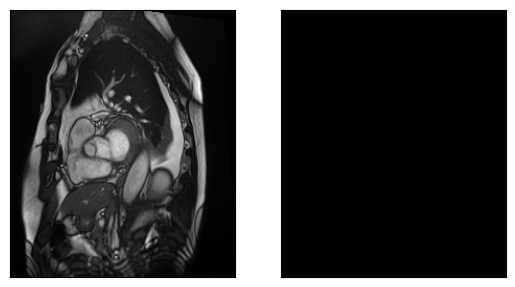

In [24]:
plt.subplot(1,2,1)
plt.imshow(img[0],cmap="gray")
plt.xticks([])
plt.yticks([])
plt.subplot(1,2,2)
plt.imshow(lab[0],cmap="gray")
plt.xticks([])
plt.yticks([])

In [18]:
import matplotlib.pyplot as plt

In [ ]:
for i, (img,label) in enumerate(zip(img,lab)):
    plt.subplot()

In [35]:
np.unique(np.load("/home/yeep/project/py/ALSph2d/data/ACDCprecessed/train/patient003_frame01_slice0_gt.npy"))

array([0, 2, 3], dtype=uint8)

In [1]:
import SimpleITK as sitk

In [ ]:
sitk.ReadImage("").Set